<a href="https://colab.research.google.com/github/vannguyenhoai43-hash/ecommerce-category-growth-analysis/blob/main/notebooks/cat_quick_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## YÊU CẦU
**Phần 1: Tổng quan:**

  - Tổng LV1 tăng/giảm như thế nào qua qua các tháng: ADO, AdGMV MoM
  - Tăng trưởng đến từ volume (ADO) hay value (AdGMV): ADO ↑ nhưng GMV ↓

**Phần 2: Phân tích động lực tăng trưởng:**

  - LV1 tăng trưởng do LV2 nào đóng góp, do sản phẩm nào: diff_ADO/GMV, contrib_ADO/GMV
  - LV2 nào tăng trưởng âm, do sản phẩm nào: diff_ADO/GMV < 0
      - Note: Lấy top 20 sản phẩm có ADO_M_1, sort thấp tới cao diff_ADO, lấy top 3
  - Tăng trưởng có bị phụ thuộc vào số nhỏ LV2 không? -check

**Phần 3: Chất lượng tăng trưởng:**
  - Cơ cấu ADO / AdGMV thay đổi thế nào qua các tháng?
  - LV2 nào tăng trưởng tốt và có quy mô lớn?: diff_ADO lớn + ado_share lớn
  - LV2 nào tăng trưởng cao nhưng base nhỏ?: diff_ADO lớn + ado_share nhỏ
  - LV2 nào đang suy giảm nhanh?: % growth âm mạnh (MoM)

**Phần 4: Xu hướng tăng trưởng ( 3 tháng)**

  - LV2 nào có xu hướng tăng/giảm
  - Items nào có xu hướng tăng/giảm
    - Note: sản phẩm phân tích ba lớp :
        - Lớp 1: diff_ado < 0 liên tiếp > 2 tháng gần nhất
        - Lớp 2: abs(sum(diff_ado)) top down, giảm đủ lớn
        - Lớp 3: Max(share_ado) top down, đóng góp đủ lớn

### Input Raw Data:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
path = "/content/drive/MyDrive/python/Quick_Report/Data_by_Month/Sep/items_df_1.csv"
df_source_items = pd.read_csv(path)

In [3]:
import pandas as pd
import numpy as np
path = "/content/drive/MyDrive/python/Quick_Report/Data_by_Month/Sep/level2_df.csv"
df_source_lv2 = pd.read_csv(path)

In [4]:
import pandas as pd
pd.options.display.max_rows = 10
pd.options.display.max_columns = 20

### Lấy riêng data tháng hiện tại:

In [5]:
df_cur_items = df_source_items[df_source_items['year_month'] == '2024-09']

In [6]:
df_cur_items

,year_month,level1_kpi_category,level2_kpi_category,item_name,ADO_M,ADO_M_1,AdGMV_M,AdGMV_M_1
1,2024-09,Vehicle Essentials,Riding Accessories,"Cốt chân phuộc winner, Sonic , exciter 135, ex...",0.003030,NaN,0.245127,NaN
5,2024-09,Vehicle Essentials,Repair Components,cốt chống đứng bộ (2 cái) xe wave s110 rsx110 ...,0.066667,NaN,0.147100,NaN
9,2024-09,Vehicle Essentials,Repair Components,"Cốt Chống Đứng CTS Xe VARIO , Air Blade 125 , ...",0.005556,0.064516,0.286732,0.391541
14,2024-09,Vehicle Essentials,Repair Components,Cốt chống đứng exciter 2006-2024 chính hãng YA...,0.108750,0.038710,0.596610,0.136859
21,2024-09,Vehicle Essentials,Repair Components,cốt chống đứng khoe (bộ 2 cái) xe dream wave n...,0.167873,NaN,0.915617,NaN
...,...,...,...,...,...,...,...,...
315030,2024-09,Home & Technical Supplies,Manual Tools,zoăng thay băng tan Phi 20-21 Phi 25-27 Không ...,0.309444,0.150538,1.147694,0.735789
315031,2024-09,Home & Technical Supplies,Heavy-duty Equipment,zoăng thay băng tan Phi 20-21 Phi 25-27 Không ...,0.008333,0.309444,0.053330,1.147694
315032,2024-09,Home & Technical Supplies,Manual Tools,Zoăng thay cho băng tan loại chịu nhiệt 21-27,0.038095,NaN,0.202288,NaN
315035,2024-09,Home & Technical Supplies,Heavy-duty Equipment,ZOYI ZT S4 ĐỒNG HỒ ĐO VẠN NĂNG TỰ ĐỘNG,1.542503,0.914761,20.211469,12.026058


In [7]:
df_cur_lv2 = df_source_lv2[df_source_lv2['year_month'] == '2024-09']

In [8]:
df_cur_lv2

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1
2,2024-09,Home & Technical Supplies,Support Supplies,3373.615984,15558.736710,2872.658502,13143.337034
5,2024-09,Vehicle Essentials,Mechanical Parts,1257.305894,7570.014491,1017.154352,6403.356208
8,2024-09,Vehicle Essentials,Vehicle Maintenance,1909.389789,9656.522330,1828.894378,10262.582355
11,2024-09,Vehicle Essentials,Maintenance Fluids,712.234388,4632.230317,804.932960,5937.830016
14,2024-09,Vehicle Essentials,Mobility Accessories,1620.329208,6667.651448,1563.389860,7742.379013
...,...,...,...,...,...,...,...
39,2024-09,Home & Technical Supplies,Heavy-duty Equipment,3857.005408,34831.208751,4016.932791,33454.748639
42,2024-09,Vehicle Essentials,Two-Wheel Vehicles,0.566667,716.843645,0.548388,824.516361
45,2024-09,Vehicle Essentials,Riding Accessories,7021.828669,21699.688309,7300.151734,24771.611622
48,2024-09,Vehicle Essentials,Repair Components,11904.668096,64326.560118,12122.097972,67197.820063


In [9]:
# Xác định tháng hiện tại và tháng trước:
cur_month_dt = pd.to_datetime(df_cur_lv2['year_month'].iloc[0])
last_month_dt = cur_month_dt - pd.DateOffset(months=1)

cur_month = f"tháng {cur_month_dt.month}"
last_month = f"tháng {(cur_month_dt - pd.DateOffset(months=1)).month}"

In [10]:
list(df_cur_lv2.columns)

['year_month',
 'level1_kpi_category',
 'level2_kpi_category',
 'ADO_M',
 'AdGMV_M',
 'ADO_M_1',
 'AdGMV_M_1']

### Hàm định dạng số

In [11]:
# Format số
def format_num(val):
    """Hàm định dạng số: 1,000,000 hoặc +10%"""
    if pd.isna(val): return "0"
    return f"{val:+,.0f}"
# Format %
def format_pct(val):
    """Hàm định dạng phần trăm"""
    if pd.isna(val): return "0%"
    return f"{val:+.2%}"
# Format về lable
def growth_lable(val):
  if val > 0:
    return "tăng"
  elif val < 0:
    return "giảm"
  else:
    return "ổn định"

##TỔNG QUAN NGÀNH HÀNG

In [12]:
# Hàm tính tăng trưởng
def _growth(df_cat):

  ado_m = df_cat['ADO_M'].sum()
  ado_m1 = df_cat['ADO_M_1'].sum()
  gmv_m = df_cat['AdGMV_M'].sum()
  gmv_m1 = df_cat['AdGMV_M_1'].sum()

  return {
  'diff_ado' : ado_m - ado_m1,
  'diff_gmv' : gmv_m - gmv_m1,
  'grow_ado' : (ado_m - ado_m1) / ado_m1  if ado_m1 != 0 else 0,
  'grow_gmv':(gmv_m - gmv_m1) / gmv_m1  if gmv_m1 != 0 else 0,
}

### PHÂN TÍCH NGÀNH HÀNG LV1

#### Hàm Tăng trưởng



In [13]:
# mapping level:
CAT_LEVEL_MAP = {
    'L1': 'level1_kpi_category',
    'L2': 'level2_kpi_category'
}

In [14]:
# Hàm tăng trưởng theo level cat
def growth_by_level(df, level_col):
    results = []

    for cat, sub_df in df.groupby(level_col):
        res = _growth(sub_df)
        res['category'] = cat
        results.append(res)

    return pd.DataFrame(results)

In [15]:
# hàm tăng trưởng nhiều level
def growth_by_mul_level(df, level_cols):
    results = []

    base_col = ['ADO_M','ADO_M_1','AdGMV_M','AdGMV_M_1']

    for level_values, sub_df in df.groupby(level_cols):

        # tính growth cho từng group
        res = _growth(sub_df)

        # Giữ lại base col
        for c in base_col:
          res[c]=sub_df[c].sum()

        # gắn lại từng level vào kết quả
        for col, val in zip(level_cols, level_values):
            res[col] = val

        results.append(res)

    return pd.DataFrame(results)

In [16]:
# Tạo cột text tăng trưởng theo cat_level
l1_growth = growth_by_level(df_cur_lv2, CAT_LEVEL_MAP['L1'])
def gen_text_growth(row):
  return (
      f"**{row['category']}**: "
      f"**ADO** {growth_lable(row['diff_ado'])} {format_num(row['diff_ado'])} "
      f"({format_pct(row['grow_ado'])} MoM), "
      f"**GMV** {growth_lable(row['diff_gmv'])} {format_num(row['diff_gmv'])} "
      f"({format_pct(row['grow_gmv'])} MoM)."
  )
l1_growth['text'] = l1_growth.apply(gen_text_growth, axis=1)
texts_l1 = l1_growth['text'].tolist()
texts_l1

['**Home & Technical Supplies**: **ADO** tăng +570 (+3.92% MoM), **GMV** tăng +11,967 (+12.49% MoM).',
 '**Vehicle Essentials**: **ADO** tăng +859 (+2.79% MoM), **GMV** tăng +3,759 (+2.15% MoM).']

In [17]:
# tăng trưởng theo level 1
l1_growth = growth_by_level(df_cur_lv2, CAT_LEVEL_MAP['L1'])
print(l1_growth)

     diff_ado      diff_gmv  grow_ado  grow_gmv                   category
0  570.146859  11966.501885  0.039242  0.124878  Home & Technical Supplies
1  859.017071   3759.055211  0.027906  0.021539         Vehicle Essentials


In [18]:
# Bảng ADO/GMV theo tháng của lv1
l1_by_month = (df_source_lv2
              .groupby(['year_month','level1_kpi_category'])
              .agg({'ADO_M':'sum','AdGMV_M':'sum'})
              .reset_index()
              )
l1_by_month

,year_month,level1_kpi_category,ADO_M,AdGMV_M
0,2024-07,Home & Technical Supplies,14404.819563,92790.688823
1,2024-07,Vehicle Essentials,28612.853177,162052.383981
2,2024-08,Home & Technical Supplies,14529.022784,95825.641870
3,2024-08,Vehicle Essentials,30782.390456,174524.614914
4,2024-09,Home & Technical Supplies,15099.169643,107792.143755
5,2024-09,Vehicle Essentials,31641.407527,178283.670125


In [19]:
diff_ado_overall=l1_growth['diff_ado'].sum()
diff_gmv_overall=l1_growth['diff_gmv'].sum()
grow_ado_overall=l1_growth['grow_ado'].sum()
grow_gmv_overall=l1_growth['grow_gmv'].sum()


In [20]:
# tăng trưởng theo level 1 + level 2
l1_L2_growth = growth_by_mul_level(df_cur_lv2, [CAT_LEVEL_MAP['L2'], CAT_LEVEL_MAP['L1']])
l1_L2_growth_sort = l1_L2_growth.sort_values('level1_kpi_category')
print(l1_L2_growth_sort)

      diff_ado     diff_gmv  grow_ado  grow_gmv         ADO_M       ADO_M_1  \
0   290.342090  3716.924910  0.234386  0.311089   1529.075623   1238.733533   
1   -24.213226  1050.865811 -0.009547  0.078658   2512.021190   2536.234416   
2  -159.927383  1376.460112 -0.039813  0.041144   3857.005408   4016.932791   
13  500.957482  2415.399676  0.174388  0.183774   3373.615984   2872.658502   
5   -11.312137  3672.836328 -0.003345  0.174806   3370.196077   3381.508214   
..         ...          ...       ...       ...           ...           ...   
6   240.151542  1166.658283  0.236101  0.182195   1257.305894   1017.154352   
4   -92.698572 -1305.599699 -0.115163 -0.219878    712.234388    804.932960   
3   359.185292  3088.709561  0.207875  0.196891   2087.075546   1727.890254   
9  -217.429876 -2871.259945 -0.017937 -0.042728  11904.668096  12122.097972   
16   80.495411  -606.060025  0.044013 -0.059055   1909.389789   1828.894378   

         AdGMV_M     AdGMV_M_1     level2_kpi_categ

In [21]:
# tăng trưởng theo level 1 + level 2 + item
item_growth = growth_by_mul_level(df_cur_items, [CAT_LEVEL_MAP['L2'], CAT_LEVEL_MAP['L1'],'item_name'])
item_growth_sort = item_growth.sort_values('level1_kpi_category')
print(item_growth_sort)

       diff_ado  diff_gmv  grow_ado  grow_gmv     ADO_M   ADO_M_1   AdGMV_M  \
0     -0.187957 -6.724823 -0.520239 -0.967552  0.173333  0.361290  0.225528   
33026 -0.022849 -0.018441 -0.354160 -0.175793  0.041667  0.064516  0.086461   
33027  0.100000  0.479061  0.000000  0.000000  0.100000  0.000000  0.479061   
33028  0.006451  0.008817  0.239975  0.037036  0.033333  0.026882  0.246882   
33029 -0.045162 -0.425562 -0.253015 -0.650456  0.133333  0.178495  0.228690   
...         ...       ...       ...       ...       ...       ...       ...   
53553  0.052688  0.417913  0.653333  1.772027  0.133333  0.080645  0.653752   
53554  0.008333  0.235830  0.000000  0.000000  0.008333  0.000000  0.235830   
53555  0.016487  0.174443  0.589727  0.572686  0.044444  0.027957  0.479048   
53543  0.036364  0.226563  0.000000  0.000000  0.036364  0.000000  0.226563   
93459  0.030873  0.115249  0.000000  0.000000  0.030873  0.000000  0.115249   

       AdGMV_M_1     level2_kpi_category        lev

#### Chart ADO/GMV theo lv1

In [150]:
import matplotlib.pyplot as plt

def plot_gmv_ado_dual_chart(df):


    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=False)

    categories = ['Vehicle Essentials', 'Home & Technical Supplies']

    for ax, cat in zip(axes, categories):
        data = df[df['level1_kpi_category'] == cat].sort_values('year_month')

        # Bar chart - GMV
        ax.bar(data['year_month'], data['AdGMV_M'], width=0.5, alpha=0.8)
        ax.set_title(f"{cat} - GMV & ADO")
        ax.set_xlabel("Year-Month")
        ax.set_ylabel("GMV")

        # Line chart - ADO (secondary axis)
        ax2 = ax.twinx()
        ax2.plot(data['year_month'], data['ADO_M'],color='darkorange', marker='o')
        ax2.set_ylabel("ADO")

        # X label xoay cho dễ đọc
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

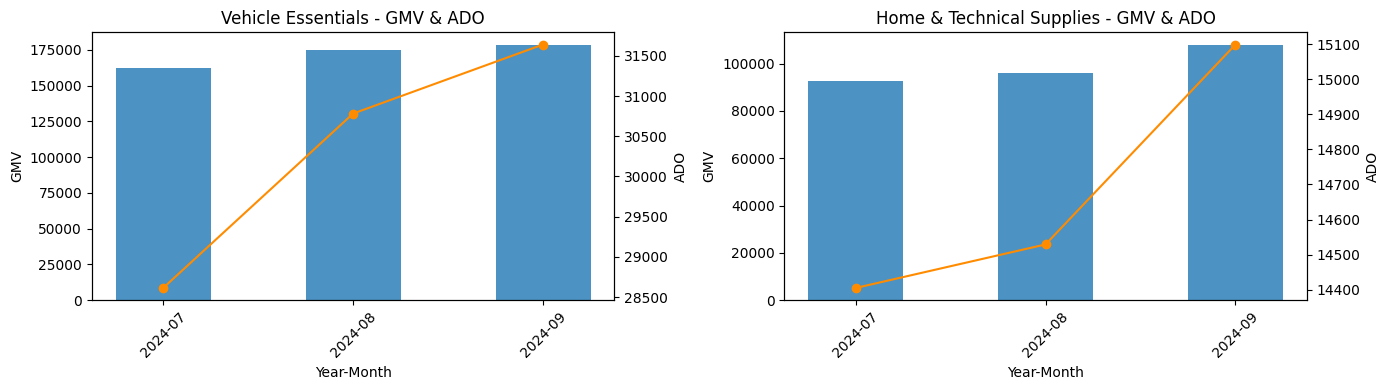

In [151]:
plot_gmv_ado_dual_chart(l1_by_month)

#### Vẽ chart tăng trưởng cat_level 2

In [152]:
df_tool = l1_L2_growth[l1_L2_growth['level1_kpi_category'] == 'Home & Technical Supplies']
df_auto = l1_L2_growth[l1_L2_growth['level1_kpi_category'] == 'Vehicle Essentials']

In [153]:
def plot_cat(df_cat,cat):
    import matplotlib.pyplot as plt

    df_cat_ado = df_cat.sort_values('diff_ado', ascending=True)
    df_cat_gmv = df_cat.sort_values('diff_gmv', ascending=True)

    fig, axes = plt.subplots(1, 2, figsize=(16, 5), dpi=120)

    # ===== ADO =====
    colors_cat = ['#2ca02c' if v > 0 else '#d62728' for v in df_cat_ado['diff_ado']]
    axes[0].barh(
        df_cat_ado['level2_kpi_category'],
        df_cat_ado['diff_ado'],
        color= colors_cat
    )
    axes[0].set_title(f'{cat} – ADO Diff', weight='bold')
    axes[0].axvline(0)

    for i, v in enumerate(df_cat_ado['diff_ado']):
        axes[0].text(
            v, i, f'{v:,.0f}',
            va='center',
            ha='left' if v > 0 else 'right',
            fontsize=9
        )

    # ===== GMV =====
    colors_tool = ['#2ca02c' if v > 0 else '#d62728' for v in df_cat_gmv['diff_gmv']]
    axes[1].barh(
        df_cat_gmv['level2_kpi_category'],
        df_cat_gmv['diff_gmv'],
        color=colors_tool
    )
    axes[1].set_title(f'{cat} – GMV Diff', weight='bold')
    axes[1].axvline(0)

    for i, v in enumerate(df_cat_gmv['diff_gmv']):
        axes[1].text(
            v, i, f'{v:,.0f}',
            va='center',
            ha='left' if v > 0 else 'right',
            fontsize=9
        )
    plt.tight_layout()
    plt.show()

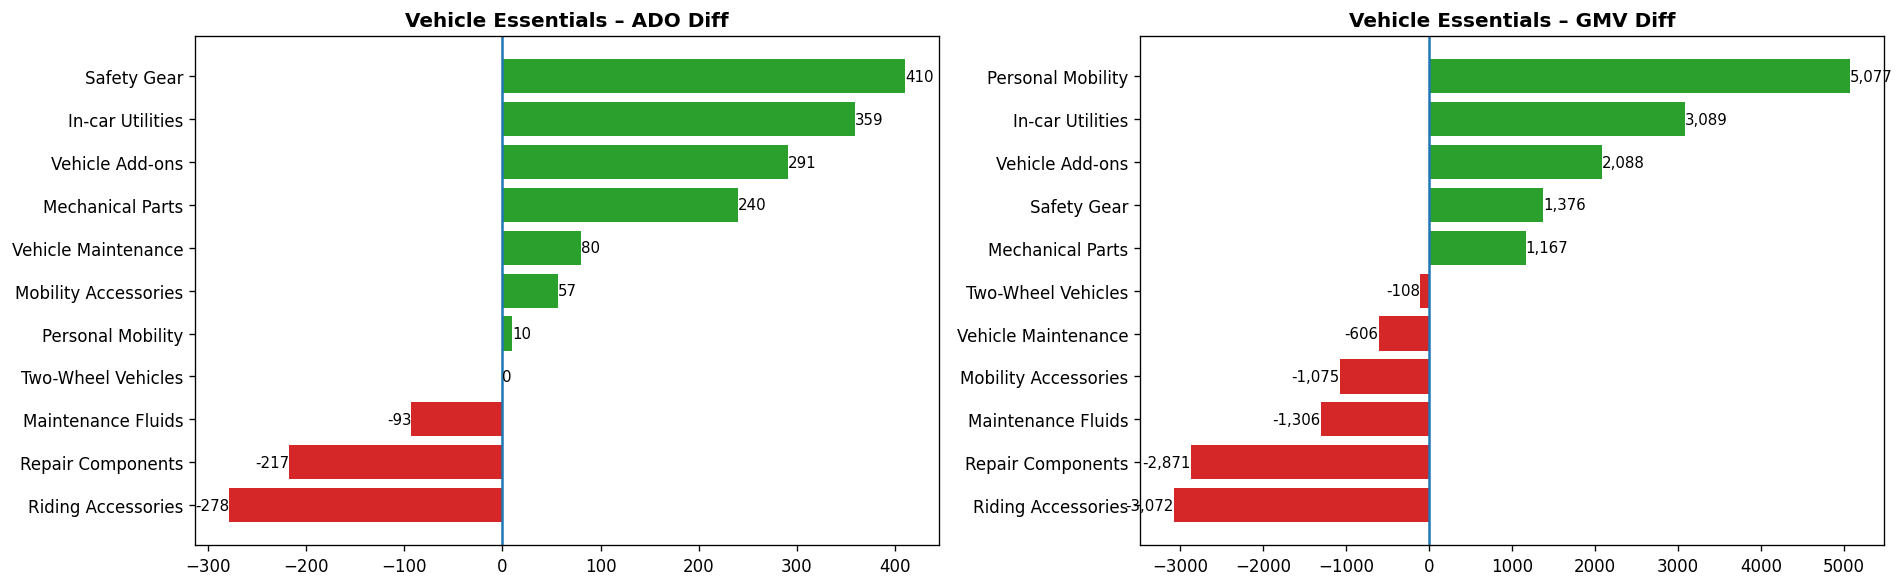

In [154]:
plot_cat(df_auto,'Vehicle Essentials')

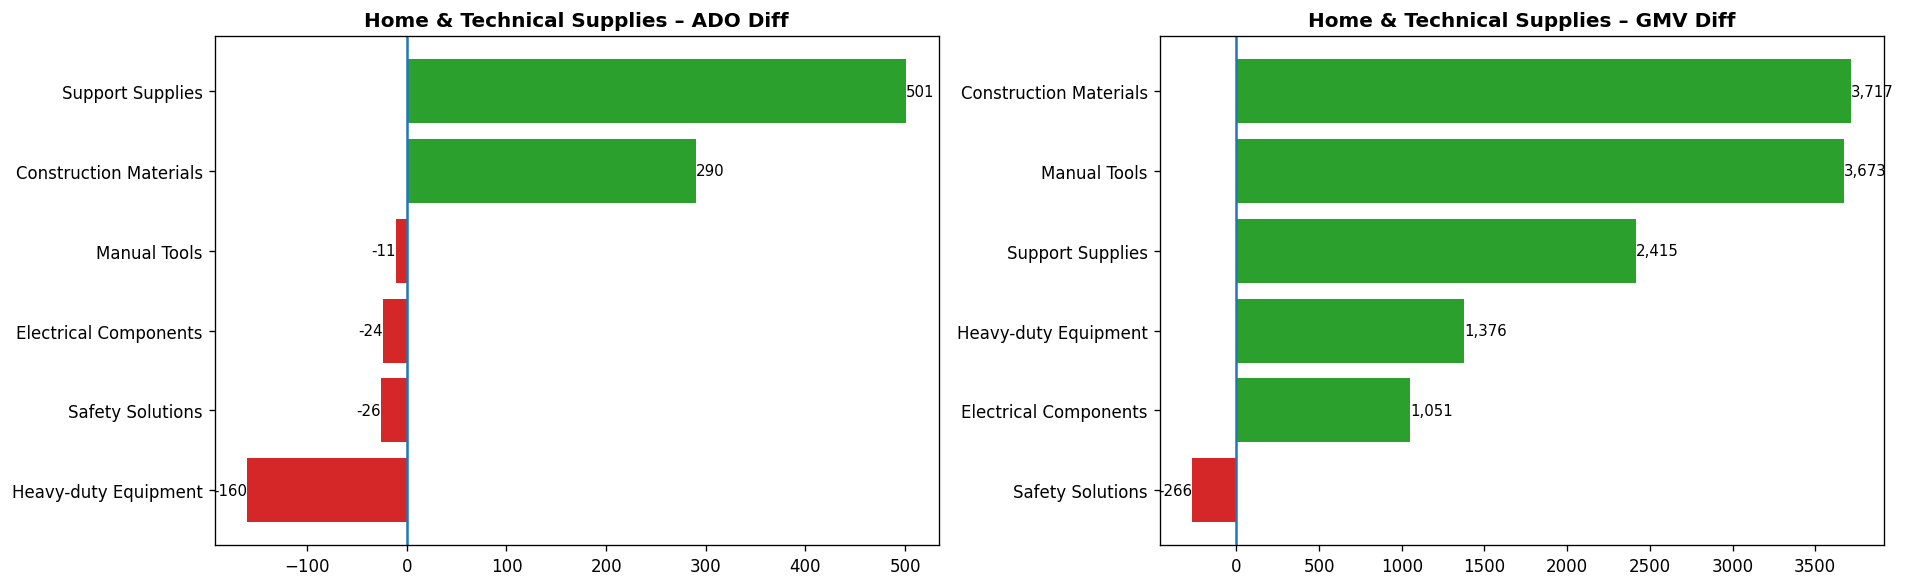

In [155]:
plot_cat(df_tool,'Home & Technical Supplies')

### PHÂN TÍCH LEVEL 2

#### CAT TĂNG

##### Bảng đóng góp theo mức tăng trưởng

In [28]:
df_contrib= l1_L2_growth_sort.copy()
# Theo ADO
df_contrib['total_ado_growth'] = df_contrib.groupby('level1_kpi_category')['diff_ado'].transform('sum')
df_contrib['contrib_ado'] = df_contrib['diff_ado']/df_contrib['total_ado_growth']
# Theo GMV
df_contrib['total_gmv_growth'] = df_contrib.groupby('level1_kpi_category')['diff_gmv'].transform('sum')
df_contrib['contrib_gmv'] = df_contrib['diff_gmv']/df_contrib['total_gmv_growth']

In [29]:
contrib_table = (df_contrib[['level1_kpi_category', 'level2_kpi_category','diff_ado' ,'diff_gmv','contrib_ado', 'contrib_gmv']]
                .sort_values('level1_kpi_category'))
contri_table_display = contrib_table.copy()
contri_table_display['contrib_ado'] = contri_table_display['contrib_ado'].apply(format_pct)
contri_table_display['contrib_gmv'] = contri_table_display['contrib_gmv'].apply(format_pct)

contri_table_display

,level1_kpi_category,level2_kpi_category,diff_ado,diff_gmv,contrib_ado,contrib_gmv
0,Home & Technical Supplies,Construction Materials,290.342090,3716.924910,+50.92%,+31.06%
1,Home & Technical Supplies,Electrical Components,-24.213226,1050.865811,-4.25%,+8.78%
2,Home & Technical Supplies,Heavy-duty Equipment,-159.927383,1376.460112,-28.05%,+11.50%
13,Home & Technical Supplies,Support Supplies,500.957482,2415.399676,+87.86%,+20.18%
5,Home & Technical Supplies,Manual Tools,-11.312137,3672.836328,-1.98%,+30.69%
...,...,...,...,...,...,...
9,Vehicle Essentials,Repair Components,-217.429876,-2871.259945,-25.31%,-76.38%
11,Vehicle Essentials,Safety Gear,410.234619,1375.558008,+47.76%,+36.59%
14,Vehicle Essentials,Two-Wheel Vehicles,0.018279,-107.672716,+0.00%,-2.86%
15,Vehicle Essentials,Vehicle Add-ons,290.833185,2088.187566,+33.86%,+55.55%


##### Top 3 contribute cat_level2

In [30]:
def highest_contrib(df, metric):

    if metric == 'ado':
        contrib_col = 'contrib_ado'
        diff_col = 'diff_ado'
    elif metric == 'gmv':
        contrib_col = 'contrib_gmv'
        diff_col = 'diff_gmv'
    else:
        raise ValueError("Invalid metric. Must be 'ado' or 'gmv'.")

    result = []

    for lvl1, sub_df in df.groupby('level1_kpi_category'):

        # Tổng toàn bộ
        total_contrib = sub_df[contrib_col].sum()
        total_diff = sub_df[diff_col].sum()

        # Top 3
        top3 = (
            sub_df
            .sort_values(contrib_col, ascending=False)
            .head(3)
            [['level1_kpi_category','level2_kpi_category', diff_col, contrib_col]]
        )

        # Tổng top 3
        top3_contrib = top3[contrib_col].sum()
        top3_diff = top3[diff_col].sum()

        # Other = total - top3
        others_row = pd.DataFrame([{
            'level1_kpi_category': lvl1,
            'level2_kpi_category': 'Others',
            diff_col: total_diff - top3_diff,
            contrib_col: total_contrib - top3_contrib
        }])

        result.append(pd.concat([top3, others_row], ignore_index=True))

    return pd.concat(result, ignore_index=True)

In [31]:
# Bảng đóng góp cao nhất theo ADO:
highest_ado_contrib = highest_contrib (contrib_table,'ado')
highest_ado_contrib .style.format({
    'contrib_ado': format_pct
})

,level1_kpi_category,level2_kpi_category,diff_ado,contrib_ado
0,Home & Technical Supplies,Support Supplies,500.957482,+87.86%
1,Home & Technical Supplies,Construction Materials,290.342090,+50.92%
2,Home & Technical Supplies,Manual Tools,-11.312137,-1.98%
3,Home & Technical Supplies,Others,-209.840576,-36.80%
4,Vehicle Essentials,Safety Gear,410.234619,+47.76%
5,Vehicle Essentials,In-car Utilities,359.185292,+41.81%
6,Vehicle Essentials,Vehicle Add-ons,290.833185,+33.86%
7,Vehicle Essentials,Others,-201.236025,-23.43%


In [32]:
# Bảng đóng góp cao nhất theo GMV:
highest_gmv_contrib = highest_contrib (contrib_table,'gmv')
highest_gmv_contrib .style.format({
    'contrib_gmv': format_pct
})

,level1_kpi_category,level2_kpi_category,diff_gmv,contrib_gmv
0,Home & Technical Supplies,Construction Materials,3716.924910,+31.06%
1,Home & Technical Supplies,Manual Tools,3672.836328,+30.69%
2,Home & Technical Supplies,Support Supplies,2415.399676,+20.18%
3,Home & Technical Supplies,Others,2161.340971,+18.06%
4,Vehicle Essentials,Personal Mobility,5077.185056,+135.07%
5,Vehicle Essentials,In-car Utilities,3088.709561,+82.17%
6,Vehicle Essentials,Vehicle Add-ons,2088.187566,+55.55%
7,Vehicle Essentials,Others,-6495.026972,-172.78%


##### Sản phẩm đóng góp

######Lọc keyword cho items

######Từ đơn

In [33]:
noise_words = {
    # Đơn vị đo lường & thông số kỹ thuật
    'v', 'w', 'mah', 'ah', 'mm', 'cm', 'm', 'kg', 'g',
    'lít', 'ml', 'inch', 'size',
    '12v', '24v', '220v', '60w', '100w', '120w',

    # Hình thức đóng gói & số lượng
    'cái', 'chiếc', 'viên', 'hộp', 'thùng', 'gói',
    'cặp', 'đôi', 'set', 'lố', 'bịch', 'cuộn',
    'mét', 'tấm', 'miếng', 'sợi',
    'que', 'cây', 'chai', 'lọ', 'tuýp', 'bình','sỉ','lẻ','viền',
    # Vị trí & hướng
    'trước', 'sau', 'trái', 'phải',
    'trên', 'dưới', 'trong', 'ngoài',
    'giữa', 'bên', 'ngang', 'dọc',
    'đứng', 'nằm', 'gầm', 'hậu',

    # Hành động / mục đích
    'dành', 'cho', 'của', 'lắp', 'độ', 'chế',
    'thay', 'thế', 'sửa', 'chữa',
    'làm', 'tẩy', 'rửa', 'xịt', 'bôi',
    'trơn', 'đánh', 'bóng', 'dán', 'ốp',
    'che', 'đựng', 'treo', 'móc', 'giữ', 'nối', 'nhận','cách','ghi','miễn',

    # Tính chất chung
    'chuyên', 'dụng', 'mini', 'nhỏ', 'lớn', 'to',
    'zin', 'xịn', 'nhập', 'khẩu', 'nội', 'địa',
    'loại', 'tốt', 'dày', 'mọi','qsmotor',

    # Màu sắc
    'đen', 'trắng', 'đỏ', 'xanh', 'vàng',
    'bạc', 'tím', 'hồng', 'cam',
    'nâu', 'xám', 'màu', 'trong', 'suốt',

    # Marketing
    'sale', 'off', 'hot', 'new',
    'mới', 'giảm', 'giá', 'rẻ',
    'siêu', 'free', 'freeship',
    'tặng', 'kèm', 'top', 'best', 'trend',

    # Khác
    'phụ', 'kiện', 'linh', 'đồ', 'nghề', 'cụ',
    'thiết', 'bị', 'hơi', 'nước', 'khí', 'nén',
    'nhà', 'cửa', 'gia', 'đình',
    'full', 'nhiều', 'mẫu', 'đủ'
}


###### Từ đôi

In [34]:
noise_phrases = [
    # Marketing / bán hàng
    'sale off',
    'bán chạy',
    'thanh lý',
    'chính hãng',
    'giá rẻ',
    'cao cấp',
    'hỏa tốc','bảo hành'

    # Thuộc tính / mô tả
    'đa năng',
    'kim loại',
    'chi tiết',
    'khổ rộng',
    'dạng sóng',
    'lấy ánh sáng',
    'hai đầu',
    'dễ thương',
    'đáng yêu',
    'ánh sáng',
    'tự động',

    # Trạng thái / phạm vi
    'ngẫu nhiên',
    'tất cả',
    'bao gồm',
    'hàng loại 1',

    # Thương hiệu / sàn / địa danh
    'shopee',
    'shopee mall',
    'made in',
    'sài gòn',
    'hà nội',
    'ib shop','gù salaya'

    # Năm
    '2017', '2018', '2019',
    '2020', '2021', '2022',
    '2023', '2024', '2025'
]

###### Hàm clean_name

In [35]:
import re
import pandas as pd
import unicodedata

def clean_and_shorten(name, num_keywords=5):
    if pd.isna(name):
        return ''
    # 1. remove keycap emoji
    name = re.sub(r'[\d]\ufe0f?\u20e3', ' ', name)

    # 2. remove emoji khác
    name = re.sub(r'[\U0001F300-\U0001FAFF]', ' ', name)

    # 3. Normalize unicode nhưng KHÔNG encode ascii
    name = unicodedata.normalize('NFKC', name)

    # 4. Lowercase
    name = name.lower()

    # 5. Bỏ nội dung trong ngoặc
    name = re.sub(r'[\(\[\{].*?[\)\]\}]', ' ', name)

    # 6. Remove phrase trước (sale off, chính hãng...)
    for phrase in noise_phrases:
        name = re.sub(rf'\b{re.escape(phrase)}\b', ' ', name)

    # 7. Replace underscore bằng space
    name = name.replace('_', ' ')

    # 8. Remove emoji & ký tự đặc biệt (GIỮ tiếng Việt)
    name = re.sub(r'[^\w\sàáạảãâầấậẩẫăằắặẳẵèéẹẻẽêềếệểễìíịỉĩòóọỏõôồốộổỗơờớợởỡùúụủũưừứựửữỳýỵỷỹđ]', ' ', name)

    # 9. Split & remove noise word (1 từ)
    words = name.split()
    keywords = [w for w in words if w not in noise_words]

    # 10. Remove duplicate – giữ thứ tự
    seen = set()
    unique_keywords = []
    for w in keywords:
        if w not in seen:
            seen.add(w)
            unique_keywords.append(w)

    return ' '.join(unique_keywords[:num_keywords])

In [36]:
#Test:
a = '🏆 𝑺𝑨𝑳𝑬 𝑶𝑭𝑭 7️⃣5️⃣% 🔥 #HEO_DẦU 👉 #SỈ_3_CON 📌 Heo FANDO 4pis (Mẫu Bố Hồng) gắn Trước và Sau cho các dòng xe'
clean_and_shorten(a)

'heo dầu 3 con fando'

In [37]:
item_df = df_cur_items.copy()

In [38]:
item_df ['keywords']= item_df ['item_name'].apply(clean_and_shorten)
item_df_sort = item_df.sort_values('ADO_M', ascending = False)

In [39]:
item_df_sort

,year_month,level1_kpi_category,level2_kpi_category,item_name,ADO_M,ADO_M_1,AdGMV_M,AdGMV_M_1,keywords
138553,2024-09,Vehicle Essentials,Repair Components,Đèn Trợ Sáng bi cầu mini xe máy xe điện chính...,255.526111,171.519124,423.858556,320.507907,đèn trợ sáng bi cầu
10928,2024-09,Vehicle Essentials,Repair Components,[1 đôi] Xi nhan chữ Z Trung quốc led đuổi audi...,188.601203,2.893056,316.361525,5.943877,xi nhan chữ z trung
213056,2024-09,Vehicle Essentials,Safety Gear,Mũ Bảo Hiểm 1/2 Nửa Đầu Sơn Đủ Màu Kiểu Dáng N...,182.728889,220.030108,432.944721,537.021441,mũ bảo hiểm 1 2
214212,2024-09,Vehicle Essentials,Safety Gear,Mũ bảo hiểm Napoli N120 nửa đầu - Đủ màu - [FR...,169.825000,156.439247,1220.051535,1118.931796,mũ bảo hiểm napoli n120
214437,2024-09,Vehicle Essentials,Safety Gear,Mũ Bảo Hiểm Nửa Đầu 1/2 Sơn Nhám Có Lỗ Thông G...,164.005556,NaN,309.977078,NaN,mũ bảo hiểm nửa đầu
...,...,...,...,...,...,...,...,...,...
141701,2024-09,Home & Technical Supplies,Electrical Components,Điện trở dán 1206 3K dây 50c chất lượng cao,0.001667,NaN,0.011887,NaN,điện trở 1206 3k dây
141695,2024-09,Home & Technical Supplies,Electrical Components,Điện trở dán 1206 2.4K dây 50c chất lượng cao,0.001667,NaN,0.023775,NaN,điện trở 1206 2 4k
141669,2024-09,Home & Technical Supplies,Electrical Components,Điện trở dán 1206 1.8K dây 50c chất lượng cao,0.001667,NaN,0.023775,NaN,điện trở 1206 1 8k
141698,2024-09,Home & Technical Supplies,Electrical Components,Điện trở dán 1206 270R dây 50c chất lượng cao,0.001667,NaN,0.011887,NaN,điện trở 1206 270r dây


In [40]:
# tăng trưởng theo level 1 + level 2 + items
item_growth = growth_by_mul_level(item_df, [CAT_LEVEL_MAP['L2'], CAT_LEVEL_MAP['L1'],'keywords'])
item_growth_sort = item_growth.sort_values('level1_kpi_category')
print(item_growth_sort)

       diff_ado  diff_gmv   grow_ado   grow_gmv     ADO_M   ADO_M_1  \
0     -0.160592 -0.707066  -0.178649  -0.241408  0.738333  0.898925   
25583  0.066667  0.171476   0.000000   0.000000  0.066667  0.000000   
25582  1.837500  9.015158   0.000000   0.000000  1.837500  0.000000   
25581  0.079659  0.651088  12.346404  34.011806  0.086111  0.006452   
25580  0.028725 -0.039050   6.233724  -0.514391  0.033333  0.004608   
...         ...       ...        ...        ...       ...       ...   
41718  0.017778  0.065601   0.000000   0.000000  0.017778  0.000000   
41719  0.282960  4.105060   0.091326   0.366533  3.381296  3.098336   
41720 -0.433963 -1.380036  -0.225557  -0.179284  1.490000  1.923963   
41712  0.017204  0.016237   1.066650   0.022960  0.033333  0.016129   
71495 -0.135618 -0.378843  -0.970190  -0.733561  0.004167  0.139785   

         AdGMV_M  AdGMV_M_1     level2_kpi_category  \
0       2.221864   2.928930  Construction Materials   
25583   0.171476   0.000000          

#####Lọc theo top level 2


In [41]:
#Lọc top ado level 2
level2_top_ado_list = (
    highest_ado_contrib
    .loc[highest_ado_contrib['level2_kpi_category'] != 'Others',
         'level2_kpi_category']
    .unique()
    .tolist()
)

level2_top_ado_list

['Support Supplies',
 'Construction Materials',
 'Manual Tools',
 'Safety Gear',
 'In-car Utilities',
 'Vehicle Add-ons']

In [42]:
#Lọc top gmv level 2
level2_top_gmv_list = (
    highest_gmv_contrib
    .loc[highest_gmv_contrib['level2_kpi_category'] != 'Others',
         'level2_kpi_category']
    .unique()
    .tolist()
)

level2_top_gmv_list

['Construction Materials',
 'Manual Tools',
 'Support Supplies',
 'Personal Mobility',
 'In-car Utilities',
 'Vehicle Add-ons']

In [43]:
#Filter top level 2 list
df_ado_l1_l2_item = item_growth[
    item_growth['level2_kpi_category'].isin(level2_top_ado_list)
].copy()

In [44]:
#Filter top level 2 list
df_gmv_l1_l2_item = item_growth[
    item_growth['level2_kpi_category'].isin(level2_top_gmv_list)
].copy()

#####Tính total tăng trưởng

In [45]:
# TÍnh tổng level 2
df_contrib_ado_item= df_ado_l1_l2_item.copy()
# Theo ADO
df_contrib_ado_item['total_ado_grow'] = df_contrib_ado_item.groupby('level2_kpi_category')['diff_ado'].transform('sum')
df_contrib_ado_item['contrib_ado'] = df_contrib_ado_item['diff_ado']/df_contrib_ado_item['total_ado_grow']
# Theo GMV
df_contrib_ado_item['total_gmv_grow'] = df_contrib_ado_item.groupby(['level2_kpi_category'])['diff_gmv'].transform('sum')
df_contrib_ado_item['contrib_gmv'] = df_contrib_ado_item['diff_gmv']/df_contrib_ado_item['total_gmv_grow']


In [46]:
# TÍnh tổng level 2
df_contrib_gmv_item= df_gmv_l1_l2_item.copy()
# Theo ADO
df_contrib_gmv_item['total_ado_grow'] = df_contrib_gmv_item.groupby('level2_kpi_category')['diff_ado'].transform('sum')
df_contrib_gmv_item['contrib_ado'] = df_contrib_gmv_item['diff_ado']/df_contrib_gmv_item['total_ado_grow']
# Theo GMV
df_contrib_gmv_item['total_gmv_grow'] = df_contrib_gmv_item.groupby(['level2_kpi_category'])['diff_gmv'].transform('sum')
df_contrib_gmv_item['contrib_gmv'] = df_contrib_gmv_item['diff_gmv']/df_contrib_gmv_item['total_gmv_grow']

#####Hàm top sp contribute tăng trưởng tốt

In [47]:
def top3_items (df,metric):
  if metric == 'ado':
        contrib_col = 'contrib_ado'
        diff_col = 'diff_ado'

  elif metric == 'gmv':
        contrib_col = 'contrib_gmv'
        diff_col = 'diff_gmv'
  else:
        raise ValueError("Invalid metric. Must be 'ado' or 'gmv'.")

  result= (
                df.sort_values(by =['level1_kpi_category',diff_col], ascending=[True,False])
                .groupby(['level2_kpi_category'])
                .head(3)
  )
  #result[contrib_col] = result[contrib_col].apply(format_pct)
  result = result [['level1_kpi_category','level2_kpi_category', 'keywords', diff_col, contrib_col]]

  return  result

In [48]:
top3_items_ado =  top3_items(df_contrib_ado_item,'ado')
top3_items_ado_sort = top3_items_ado.sort_values(['level1_kpi_category','level2_kpi_category'],ascending = [True,True])
top3_items_ado_sort

,level1_kpi_category,level2_kpi_category,keywords,diff_ado,contrib_ado
1687,Home & Technical Supplies,Construction Materials,xi măng dẻo bịt lỗ,115.172424,0.217395
992,Home & Technical Supplies,Construction Materials,sàn nhựa giả gỗ sẵn,61.499444,0.116084
993,Home & Technical Supplies,Construction Materials,sàn nhựa giả vân gỗ,21.716667,0.040991
28093,Home & Technical Supplies,Manual Tools,máy siết bulong bs iw850n,22.695000,0.025472
28534,Home & Technical Supplies,Manual Tools,mũi khoan tháp 4 12,19.832778,0.022260
...,...,...,...,...,...
61334,Vehicle Essentials,Safety Gear,mũ bảo hiểm lưỡi trai,124.079715,0.128167
61416,Vehicle Essentials,Safety Gear,mũ bảo hiểm đai da,92.927717,0.095989
67104,Vehicle Essentials,Vehicle Add-ons,combo 4 nắp van bánh,23.312540,0.055001
67990,Vehicle Essentials,Vehicle Add-ons,nẹp decal bậc xe ô,22.225852,0.052437


In [49]:
top3_items_gmv =  top3_items(df_contrib_gmv_item,'gmv')
top3_items_gmv_sort = top3_items_gmv.sort_values(['level1_kpi_category','level2_kpi_category'],ascending = [True,True])
top3_items_gmv_sort

,level1_kpi_category,level2_kpi_category,keywords,diff_gmv,contrib_gmv
992,Home & Technical Supplies,Construction Materials,sàn nhựa giả gỗ sẵn,878.863229,0.172220
993,Home & Technical Supplies,Construction Materials,sàn nhựa giả vân gỗ,365.989754,0.071719
480,Home & Technical Supplies,Construction Materials,combo 1 36 sàn nhựa,283.121069,0.055480
28051,Home & Technical Supplies,Manual Tools,máy khoan đục bê tông,343.459833,0.040703
28157,Home & Technical Supplies,Manual Tools,máy siết bulong pin drama,245.156173,0.029053
...,...,...,...,...,...
35708,Vehicle Essentials,Personal Mobility,xe đạp điện moka niceshine,795.039114,0.117169
35532,Vehicle Essentials,Personal Mobility,xe điện 3 bánh super,684.492399,0.100877
68050,Vehicle Essentials,Vehicle Add-ons,quây chống chuột xe ô,491.234590,0.161210
68049,Vehicle Essentials,Vehicle Add-ons,quây chống chuột rào chắn,173.449046,0.056921


##### Text insight

In [50]:
def insight_ado_gmv_from_items(
    contrib_ado_df,
    contrib_gmv_df,
    df_ado,
    df_gmv,
    lvl1
):

    # Lọc orthers
    sub_contrib_ado = contrib_ado_df.loc[
    (contrib_ado_df['level1_kpi_category'] == lvl1) &
    (contrib_ado_df['level2_kpi_category'] != 'Others'),
    ['level1_kpi_category','level2_kpi_category', 'diff_ado', 'contrib_ado']].copy()

    sub_contrib_gmv = contrib_gmv_df.loc[
    (contrib_gmv_df['level1_kpi_category'] == lvl1) &
    (contrib_gmv_df['level2_kpi_category'] != 'Others'),
    ['level1_kpi_category','level2_kpi_category', 'diff_gmv', 'contrib_gmv']].copy()

    # Lọc level 1 trong bảng items
    sub_ado = df_ado[df_ado['level1_kpi_category'] == lvl1].copy()
    sub_gmv = df_gmv[df_gmv['level1_kpi_category'] == lvl1].copy()

    lines = []
    lines.append(f"**Về {lvl1}**")

    # ================= ADO ================

    ado_names = ', '.join(sub_contrib_ado['level2_kpi_category'])
    ado_contrib = sub_contrib_ado['contrib_ado'].sum()

    lines.append(
        f"- **ADO**: Tăng trưởng chủ yếu đến từ các ngành hàng "
        f" **{ado_names}**, đóng góp {ado_contrib:.1%} tổng mức tăng. Một số sản phẩm tiêu biểu như: \n \n"
    )

    for lvl2 in sub_ado['level2_kpi_category'].unique():

        items = (
            sub_ado[sub_ado['level2_kpi_category'] == lvl2]
            .sort_values('diff_ado', ascending=False)
            .head(3)
        )

        item_text = ", ".join(
            f"**{i['keywords']}** ({i['diff_ado']:+.2f} ADO)"
            for _, i in items.iterrows()
        )

        lines.append(f"  - **{lvl2}**: {item_text}")

    # ================= GMV =================

    gmv_names = ', '.join(sub_contrib_gmv['level2_kpi_category'])
    gmv_contrib = sub_contrib_gmv['contrib_gmv'].sum()

    lines.append(
        "\n"
        f"- **GMV**: Tăng trưởng chủ yếu đến từ nhóm "
        f"(**{gmv_names}**), đóng góp {gmv_contrib:.1%} tổng mức tăng. Một số sản phẩm tiêu biểu như:\n \n"
    )

    for lvl2 in sub_gmv['level2_kpi_category'].unique():
        items = (
            sub_gmv[sub_gmv['level2_kpi_category'] == lvl2]
            .sort_values('diff_gmv', ascending=False)
            .head(3)
        )

        item_text = ", ".join(
            f"**{i['keywords']}** ({i['diff_gmv']:+.2f} GMV)"
            for _, i in items.iterrows()
        )

        lines.append(f"  - **{lvl2}**: {item_text}")

    return "\n \n".join(lines)

In [51]:
print(
    insight_ado_gmv_from_items(
            contrib_ado_df= highest_ado_contrib,
            contrib_gmv_df= highest_gmv_contrib,
            df_ado= top3_items_ado,
            df_gmv = top3_items_gmv,
            lvl1="Automotive"
    )
)

**Về Automotive**
 
- **ADO**: Tăng trưởng chủ yếu đến từ các ngành hàng  ****, đóng góp 0.0% tổng mức tăng. Một số sản phẩm tiêu biểu như: 
 

 

- **GMV**: Tăng trưởng chủ yếu đến từ nhóm (****), đóng góp 0.0% tổng mức tăng. Một số sản phẩm tiêu biểu như:
 



In [52]:
highest_ado_contrib

,level1_kpi_category,level2_kpi_category,diff_ado,contrib_ado
0,Home & Technical Supplies,Support Supplies,500.957482,0.878646
1,Home & Technical Supplies,Construction Materials,290.342090,0.509241
2,Home & Technical Supplies,Manual Tools,-11.312137,-0.019841
3,Home & Technical Supplies,Others,-209.840576,-0.368047
4,Vehicle Essentials,Safety Gear,410.234619,0.477563
5,Vehicle Essentials,In-car Utilities,359.185292,0.418135
6,Vehicle Essentials,Vehicle Add-ons,290.833185,0.338565
7,Vehicle Essentials,Others,-201.236025,-0.234263


In [53]:
print(
    insight_ado_gmv_from_items(
            contrib_ado_df= highest_ado_contrib,
            contrib_gmv_df= highest_gmv_contrib,
            df_ado= top3_items_ado,
            df_gmv = top3_items_gmv,
            lvl1="Tools & Home Improvement"
    )
)

**Về Tools & Home Improvement**
 
- **ADO**: Tăng trưởng chủ yếu đến từ các ngành hàng  ****, đóng góp 0.0% tổng mức tăng. Một số sản phẩm tiêu biểu như: 
 

 

- **GMV**: Tăng trưởng chủ yếu đến từ nhóm (****), đóng góp 0.0% tổng mức tăng. Một số sản phẩm tiêu biểu như:
 



#### CAT GIẢM

##### Cat level 2 giảm/ tăng trưởng chậm:

In [54]:
df_lowest_l2_ado = (contrib_table
                  .query("diff_ado < 0")
                  .sort_values(by=['level1_kpi_category','diff_ado'],ascending=[True,True])
                  .groupby('level1_kpi_category')
                  .head(3)
                  [['level1_kpi_category','level2_kpi_category', 'diff_ado', 'contrib_ado']]
)
df_lowest_l2_ado

,level1_kpi_category,level2_kpi_category,diff_ado,contrib_ado
2,Home & Technical Supplies,Heavy-duty Equipment,-159.927383,-0.280502
12,Home & Technical Supplies,Safety Solutions,-25.699967,-0.045076
1,Home & Technical Supplies,Electrical Components,-24.213226,-0.042468
10,Vehicle Essentials,Riding Accessories,-278.323065,-0.324002
9,Vehicle Essentials,Repair Components,-217.429876,-0.253115
4,Vehicle Essentials,Maintenance Fluids,-92.698572,-0.107912


In [55]:
# Theo ADO
low_grow_ado_cat = df_lowest_l2_ado['level2_kpi_category'].unique()
low_grow_ado_cat

array(['Heavy-duty Equipment', 'Safety Solutions',
       'Electrical Components', 'Riding Accessories', 'Repair Components',
       'Maintenance Fluids'], dtype=object)

In [56]:
# Bảng theo lowest_l2_ado
df_ado_all_months = df_source_lv2.loc[
    (df_source_lv2['level2_kpi_category'].isin(low_grow_ado_cat))
].copy()
df_ado_all_months

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1
9,2024-07,Vehicle Essentials,Maintenance Fluids,783.097984,5707.391972,NaN,NaN
10,2024-08,Vehicle Essentials,Maintenance Fluids,804.932960,5937.830016,783.097984,5707.391972
11,2024-09,Vehicle Essentials,Maintenance Fluids,712.234388,4632.230317,804.932960,5937.830016
22,2024-07,Home & Technical Supplies,Electrical Components,2508.064401,12851.773372,NaN,NaN
23,2024-08,Home & Technical Supplies,Electrical Components,2536.234416,13360.015798,2508.064401,12851.773372
...,...,...,...,...,...,...,...
47,2024-08,Vehicle Essentials,Repair Components,12122.097972,67197.820063,11202.591139,62584.391202
48,2024-09,Vehicle Essentials,Repair Components,11904.668096,64326.560118,12122.097972,67197.820063
49,2024-07,Home & Technical Supplies,Safety Solutions,445.899070,2742.801371,NaN,NaN
50,2024-08,Home & Technical Supplies,Safety Solutions,482.955328,2908.470380,445.899070,2742.801371


In [57]:
# Trend 3 tháng
def trend_cat_l2 (df,metric,lv1):

    # select biến
    if metric == 'ado':
      metric_M = 'ADO_M'
    elif metric == 'gmv':
      metric_M = 'AdGMV_M'
    else:
      raise ValueError("Invalid metric. Must be 'ado' or 'gmv'.")

    # tạo bảng pivot
    result = (
        df.pivot_table(
            index=['level1_kpi_category','level2_kpi_category'],
            columns = 'year_month',
            values = metric_M,
            aggfunc ='sum'
        )
        .reset_index()
    )
    result = result[result['level1_kpi_category']== lv1]
    return result

In [58]:
# Theo GMV
df_lowest_l2_gmv = (contrib_table
                  .query("diff_gmv < 0")
                  .sort_values(by=['level1_kpi_category','diff_gmv'],ascending=[True,True])
                  .groupby('level1_kpi_category')
                  .head(3)
                  #.assign(contrib_gmv= lambda x: x['contrib_ado'].apply(format_pct))
                  [['level1_kpi_category','level2_kpi_category', 'diff_gmv', 'contrib_gmv']]
)
df_lowest_l2_gmv

,level1_kpi_category,level2_kpi_category,diff_gmv,contrib_gmv
12,Home & Technical Supplies,Safety Solutions,-265.984952,-0.022227
10,Vehicle Essentials,Riding Accessories,-3071.923313,-0.817206
9,Vehicle Essentials,Repair Components,-2871.259945,-0.763825
4,Vehicle Essentials,Maintenance Fluids,-1305.599699,-0.347321


In [59]:
low_grow_gmv_cat = df_lowest_l2_gmv['level2_kpi_category'].unique()
low_grow_gmv_cat

array(['Safety Solutions', 'Riding Accessories', 'Repair Components',
       'Maintenance Fluids'], dtype=object)

In [60]:
df_gmv_all_months = df_source_lv2.loc[
    (df_source_lv2['level2_kpi_category'].isin(low_grow_gmv_cat))
].copy()
df_gmv_all_months

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1
9,2024-07,Vehicle Essentials,Maintenance Fluids,783.097984,5707.391972,NaN,NaN
10,2024-08,Vehicle Essentials,Maintenance Fluids,804.932960,5937.830016,783.097984,5707.391972
11,2024-09,Vehicle Essentials,Maintenance Fluids,712.234388,4632.230317,804.932960,5937.830016
43,2024-07,Vehicle Essentials,Riding Accessories,6777.253008,23415.663317,NaN,NaN
44,2024-08,Vehicle Essentials,Riding Accessories,7300.151734,24771.611622,6777.253008,23415.663317
...,...,...,...,...,...,...,...
47,2024-08,Vehicle Essentials,Repair Components,12122.097972,67197.820063,11202.591139,62584.391202
48,2024-09,Vehicle Essentials,Repair Components,11904.668096,64326.560118,12122.097972,67197.820063
49,2024-07,Home & Technical Supplies,Safety Solutions,445.899070,2742.801371,NaN,NaN
50,2024-08,Home & Technical Supplies,Safety Solutions,482.955328,2908.470380,445.899070,2742.801371


######Chart Line

In [61]:
#Chia bảng ADO theo cat l1
auto_trend_ado = trend_cat_l2 (df_ado_all_months,'ado','Vehicle Essentials')
tool_trend_ado = trend_cat_l2 (df_ado_all_months,'ado','Home & Technical Supplies')

In [62]:
# #Chia bảng GMV theo cat l1
auto_trend_gmv = trend_cat_l2 (df_gmv_all_months,'gmv','Vehicle Essentials')
tool_trend_gmv = trend_cat_l2 (df_gmv_all_months,'gmv','Home & Technical Supplies')

In [63]:
# Hàm vẽ Chart
import matplotlib.pyplot as plt
def plot_trend_cat(df_ado,df_gmv,lvl1):

    # Lấy tất cả cột tháng (df đã pivot sẵn)
    month_cols = df_ado.columns.difference(
        ['level1_kpi_category', 'level2_kpi_category']
    )

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # --- ADO---
    (
        df_ado
        .set_index('level2_kpi_category')[month_cols]
        .T
        .plot(
            ax=axes[0],
            marker='o',
            title=f'ADO Trend - {lvl1}'
        )
    )

    axes[0].set_xlabel('Month')
    axes[0].set_ylabel('ADO')

    # --- GMV ---
    (
        df_gmv
        .set_index('level2_kpi_category')[month_cols]
        .T
        .plot(
            ax=axes[1],
            marker='o',
            title=f'GMV Trend - {lvl1}'
        )
    )

    axes[1].set_xlabel('Month')

    plt.tight_layout()
    plt.show()


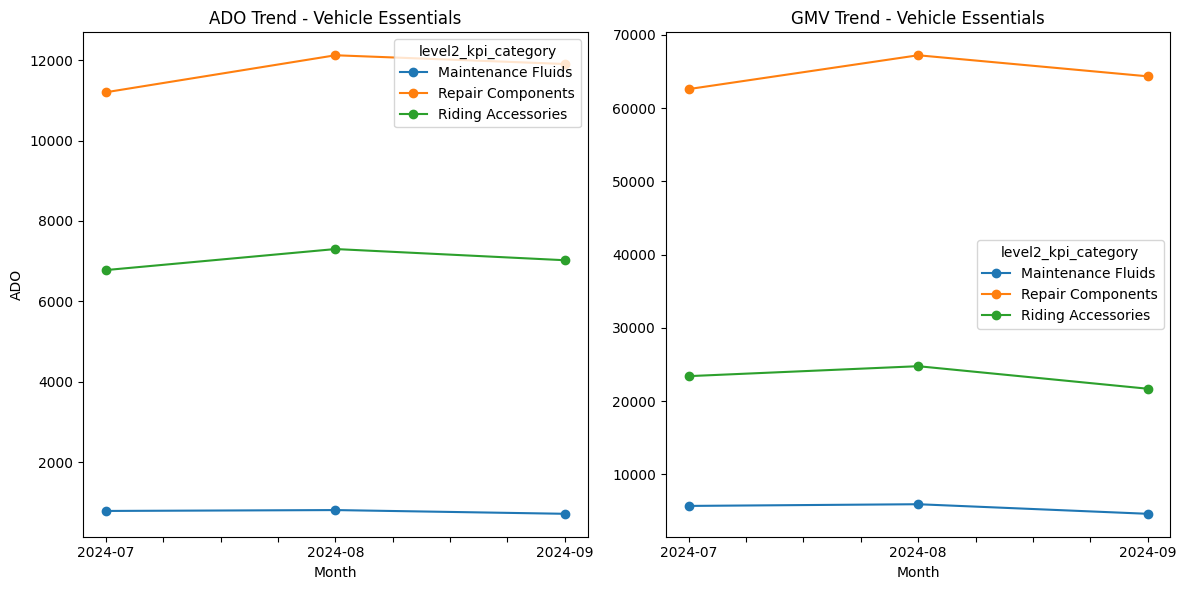

In [64]:
plot_trend_cat(auto_trend_ado,auto_trend_gmv,"Vehicle Essentials")

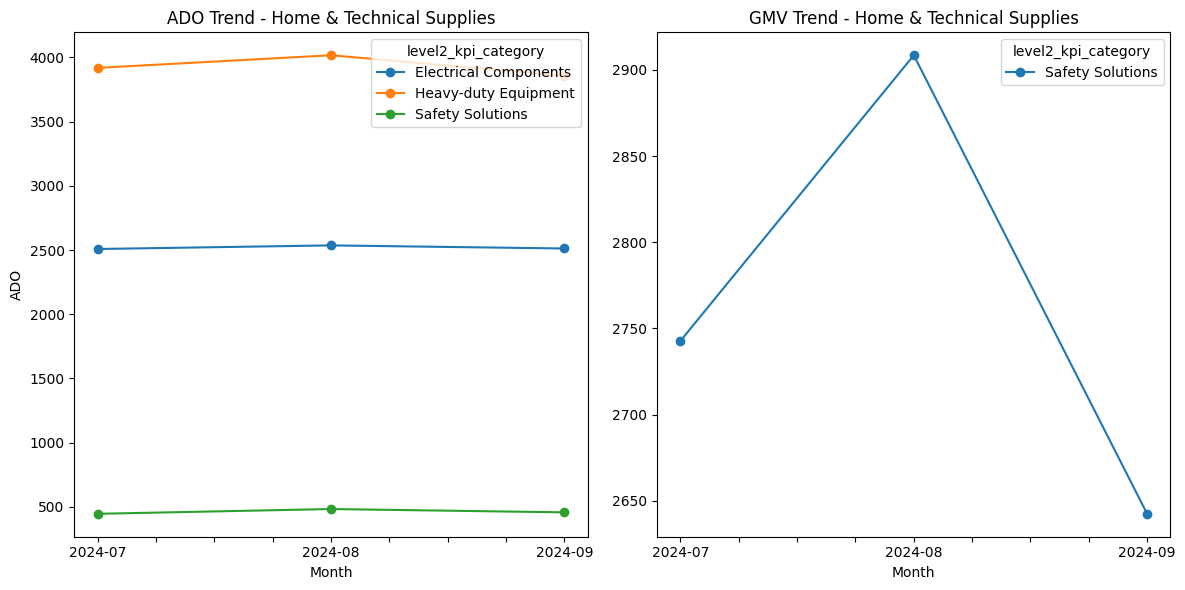

In [65]:
plot_trend_cat(tool_trend_ado,tool_trend_gmv,"Home & Technical Supplies")

##### Sản phẩm đóng góp

In [66]:
#Filter low ado level 2 list
df_low_ado_items = item_growth[
    item_growth['level2_kpi_category'].isin(low_grow_ado_cat)
].copy()
df_low_ado_items

,diff_ado,diff_gmv,grow_ado,grow_gmv,ADO_M,ADO_M_1,AdGMV_M,AdGMV_M_1,level2_kpi_category,level1_kpi_category,keywords
1845,0.007639,0.114031,0.000000,0.000000,0.007639,0.000000,0.114031,0.000000,Electrical Components,Home & Technical Supplies,0 5kg vỉ nguồn đèn
1846,-0.036254,-0.036312,-0.280969,-0.148738,0.092778,0.129032,0.207822,0.244134,Electrical Components,Home & Technical Supplies,01 động cơ máy bay
1847,0.138095,0.278013,0.000000,0.000000,0.138095,0.000000,0.278013,0.000000,Electrical Components,Home & Technical Supplies,02 tờ giấy pha điện
1848,0.528889,1.776862,0.000000,0.000000,0.528889,0.000000,1.776862,0.000000,Electrical Components,Home & Technical Supplies,041020 3 7v tai nghe
1849,0.100000,0.263912,0.000000,0.000000,0.100000,0.000000,0.263912,0.000000,Electrical Components,Home & Technical Supplies,1 bộ jack cắm anderson
...,...,...,...,...,...,...,...,...,...,...,...
62343,0.033333,0.417571,0.000000,0.000000,0.033333,0.000000,0.417571,0.000000,Safety Solutions,Home & Technical Supplies,ổ khóa đĩa yeti vuông
62344,0.116667,1.784992,0.000000,0.000000,0.116667,0.000000,1.784992,0.000000,Safety Solutions,Home & Technical Supplies,ổ khóa đấm việt tiệp
62345,0.008333,0.098733,0.000000,0.000000,0.008333,0.000000,0.098733,0.000000,Safety Solutions,Home & Technical Supplies,ổ khóa đồng 4p 5p
62346,0.206667,3.336522,0.000000,0.000000,0.206667,0.000000,3.336522,0.000000,Safety Solutions,Home & Technical Supplies,ổ khóa đồng thau chìa


In [67]:
#Filter low gmv level 2 list
df_low_gmv_items = item_growth[
    item_growth['level2_kpi_category'].isin(low_grow_gmv_cat)
].copy()
df_low_gmv_items

,diff_ado,diff_gmv,grow_ado,grow_gmv,ADO_M,ADO_M_1,AdGMV_M,AdGMV_M_1,level2_kpi_category,level1_kpi_category,keywords
22633,-0.094624,-2.838434,-0.586670,-0.442129,0.066666,0.161290,3.581491,6.419925,Maintenance Fluids,Vehicle Essentials,1 12 dầu nhớt vilube
22634,0.239785,5.346487,1.238892,0.876030,0.433333,0.193548,11.449575,6.103088,Maintenance Fluids,Vehicle Essentials,1 12 nhớt mobil super
22635,-0.554660,-17.740398,-0.344463,-0.314460,1.055556,1.610216,38.675024,56.415422,Maintenance Fluids,Vehicle Essentials,1 12 nhớt tổng hợp
22636,0.001075,0.078054,0.033325,0.104372,0.033333,0.032258,0.825898,0.747844,Maintenance Fluids,Vehicle Essentials,1 48 nhớt số horeca
22637,0.036111,0.198236,0.000000,0.000000,0.036111,0.000000,0.198236,0.000000,Maintenance Fluids,Vehicle Essentials,1 dưỡng sên xe máy
...,...,...,...,...,...,...,...,...,...,...,...
62343,0.033333,0.417571,0.000000,0.000000,0.033333,0.000000,0.417571,0.000000,Safety Solutions,Home & Technical Supplies,ổ khóa đĩa yeti vuông
62344,0.116667,1.784992,0.000000,0.000000,0.116667,0.000000,1.784992,0.000000,Safety Solutions,Home & Technical Supplies,ổ khóa đấm việt tiệp
62345,0.008333,0.098733,0.000000,0.000000,0.008333,0.000000,0.098733,0.000000,Safety Solutions,Home & Technical Supplies,ổ khóa đồng 4p 5p
62346,0.206667,3.336522,0.000000,0.000000,0.206667,0.000000,3.336522,0.000000,Safety Solutions,Home & Technical Supplies,ổ khóa đồng thau chìa


In [68]:
# TÍnh tổng level 2
df_contrib_low_ado_items = df_low_ado_items.copy()
# Theo ADO
df_contrib_low_ado_items['total_ado_grow'] = df_contrib_low_ado_items.groupby('level2_kpi_category')['diff_ado'].transform('sum')
df_contrib_low_ado_items['contrib_ado'] = df_contrib_low_ado_items['diff_ado']/df_contrib_low_ado_items['total_ado_grow']

In [69]:
# TÍnh tổng level 2
df_contrib_low_gmv_items = df_low_gmv_items.copy()
# Theo GMV
df_contrib_low_gmv_items['total_gmv_grow'] = df_contrib_low_gmv_items.groupby('level2_kpi_category')['diff_gmv'].transform('sum')
df_contrib_low_gmv_items['contrib_gmv'] = df_contrib_low_gmv_items['diff_gmv']/df_contrib_low_gmv_items['total_gmv_grow']

In [70]:
# Hàm tăng trưởng âm
def top3_items_low (df,metric):
  if metric == 'ado':
        contrib_col = 'contrib_ado'
        diff_col = 'diff_ado'
        col_M = 'ADO_M'
        col_M_1 = 'ADO_M_1'
  elif metric == 'gmv':
        contrib_col = 'contrib_gmv'
        diff_col = 'diff_gmv'
        col_M = 'AdGMV_M'
        col_M_1 = 'AdGMV_M_1'
  else:
        raise ValueError("Invalid metric. Must be 'ado' or 'gmv'.")

  result = df.sort_values([col_M_1], ascending= False).head(20)
  result= (
                df.sort_values(by =['level1_kpi_category',diff_col], ascending=[True,True])
                .groupby(['level2_kpi_category'])
                .head(3)
  )

  result = result [['level1_kpi_category','level2_kpi_category', 'keywords',col_M,col_M_1, diff_col, contrib_col]]

  return  result

In [71]:
top3_items_low_ado =  top3_items_low(df_contrib_low_ado_items,'ado')
top3_items_low_ado_sort = top3_items_low_ado.sort_values(['level1_kpi_category','level2_kpi_category'],ascending = True)
top3_items_low_ado_sort

,level1_kpi_category,level2_kpi_category,keywords,ADO_M,ADO_M_1,diff_ado,contrib_ado
2903,Home & Technical Supplies,Electrical Components,bộ cùm công tắc fz,8.862222,46.749206,-37.886984,-0.058679
3940,Home & Technical Supplies,Electrical Components,công tắc điều khiển từ,123.549212,147.483676,-23.934464,-0.037069
8757,Home & Technical Supplies,Electrical Components,tụ quạt trần điện 2,22.874877,34.218706,-11.343829,-0.017569
15706,Home & Technical Supplies,Heavy-duty Equipment,mỡ hàn thiếc trợ chì,1.786895,19.163638,-17.376743,-0.018394
11350,Home & Technical Supplies,Heavy-duty Equipment,bộ lục giác đầu bi,3.838519,19.937725,-16.099206,-0.017042
...,...,...,...,...,...,...,...
48173,Vehicle Essentials,Repair Components,tay nắm kiểu sh mode,5.624444,43.049768,-37.425324,-0.013923
40324,Vehicle Essentials,Repair Components,cùm tăng tốc domino bao,1.435834,37.627857,-36.192023,-0.013465
53359,Vehicle Essentials,Riding Accessories,bao tay daytona gù salaya,8.856376,58.182963,-49.326587,-0.032868
53197,Vehicle Essentials,Riding Accessories,7 titan cực đẹp gắn,0.429999,47.061074,-46.631075,-0.031072


In [72]:
top3_items_low_gmv =  top3_items_low(df_contrib_low_gmv_items,'gmv')
top3_items_low_gmv_sort = top3_items_low_gmv.sort_values(['level1_kpi_category','level2_kpi_category'],ascending = True)
top3_items_low_gmv_sort

,level1_kpi_category,level2_kpi_category,keywords,AdGMV_M,AdGMV_M_1,diff_gmv,contrib_gmv
62116,Home & Technical Supplies,Safety Solutions,két sắt điện tử xiaomi,55.897910,104.648486,-48.750576,-0.063396
61884,Home & Technical Supplies,Safety Solutions,combo 2 cháy bột abc,12.780541,48.072587,-35.292046,-0.045894
61883,Home & Technical Supplies,Safety Solutions,combo 2 cháy 4kg cứu,240.572160,270.104531,-29.532371,-0.038404
23149,Vehicle Essentials,Maintenance Fluids,mỡ tra bảo dưỡng xe,36.637142,65.880033,-29.242891,-0.030252
22748,Vehicle Essentials,Maintenance Fluids,combo nhớt máy láp shell,1.854282,23.245143,-21.390861,-0.022129
...,...,...,...,...,...,...,...
47976,Vehicle Essentials,Repair Components,sạc ắc quy 6ah 150ah,0.631246,203.244219,-202.612973,-0.010899
52150,Vehicle Essentials,Repair Components,động cơ 5000w v4 12,119.888941,297.269863,-177.380922,-0.009542
60303,Vehicle Essentials,Riding Accessories,động cơ qs 3kv4 và,472.424557,896.054256,-423.629699,-0.121181
53508,Vehicle Essentials,Riding Accessories,bi led 3 0 e11,1.332288,139.470992,-138.138704,-0.039515


##### Text insight

In [73]:
# Hàm Insight
def insight_low_ado_gmv_items(
    contrib_ado_df,
    contrib_gmv_df,
    df_ado,
    df_gmv,
    lvl1
):
    # Lọc orthers
    sub_contrib_ado = contrib_ado_df.loc[
    (contrib_ado_df['level1_kpi_category'] == lvl1),
    ['level1_kpi_category','level2_kpi_category', 'diff_ado', 'contrib_ado']].copy()

    sub_contrib_gmv = contrib_gmv_df.loc[
    (contrib_gmv_df['level1_kpi_category'] == lvl1),
    ['level1_kpi_category','level2_kpi_category', 'diff_gmv', 'contrib_gmv']].copy()

    # Lọc level 1 trong bảng items
    sub_ado = df_ado[df_ado['level1_kpi_category'] == lvl1].copy()
    sub_gmv = df_gmv[df_gmv['level1_kpi_category'] == lvl1].copy()

    lines = []
    lines.append(f"**Về {lvl1}**")

    # ================= ADO ================

    ado_names = ', '.join( sub_contrib_ado['level2_kpi_category'])
    ado_contrib =  sub_contrib_ado['contrib_ado'].sum()

    lines.append(
        f"- **ADO**: Ngành hàng tăng trưởng chậm/ giảm gồm: "
        f"**{ado_names}**, chiếm {ado_contrib:.1%} tổng mức biến động. Một số sản phẩm giảm ADO đáng chú ý như: \n \n"
    )

    for lvl2 in sub_ado['level2_kpi_category'].unique():

        items = (
            sub_ado[sub_ado['level2_kpi_category'] == lvl2]
            .sort_values('diff_ado', ascending=False)
            .head(3)
        )

        item_text = ", ".join(
            f"**{i['keywords']}** ({i['diff_ado']:.2f} ADO)"
            for _, i in items.iterrows()
        )

        lines.append(f"  - **{lvl2}**: {item_text}.")

    # ================= GMV =================

    gmv_names = ', '.join(sub_contrib_gmv['level2_kpi_category'])
    gmv_contrib = sub_contrib_gmv['contrib_gmv'].sum()

    lines.append(
        "\n"
        f"- **GMV**: Ngành hàng tăng trưởng chậm/ giảm gồm: "
        f"(**{gmv_names}**), chiếm {gmv_contrib:.1%} tổng mức biến động. Một số sản phẩm giảm GMV đáng chú ý như: \n \n"
    )

    for lvl2 in sub_gmv['level2_kpi_category'].unique():
        items = (
            sub_gmv[sub_gmv['level2_kpi_category'] == lvl2]
            .sort_values('diff_gmv', ascending=False)
            .head(3)
        )

        item_text = ", ".join(
            f"**{i['keywords']}** ({i['diff_gmv']:.2f} GMV)"
            for _, i in items.iterrows()
        )

        lines.append(f"  - **{lvl2}**: {item_text}.")

    return "\n \n".join(lines)

In [74]:
insight_low_ado_gmv_items(
                             contrib_ado_df= df_lowest_l2_ado,
                             contrib_gmv_df= df_lowest_l2_gmv,
                             df_ado= top3_items_low_ado,
                             df_gmv = top3_items_low_gmv,
                             lvl1="Vehicle Essentials"
                                        )

'**Về Vehicle Essentials**\n \n- **ADO**: Ngành hàng tăng trưởng chậm/ giảm gồm: **Riding Accessories, Repair Components, Maintenance Fluids**, chiếm -68.5% tổng mức biến động. Một số sản phẩm giảm ADO đáng chú ý như: \n \n\n \n  - **Repair Components**: **cùm tăng tốc domino bao** (-36.19 ADO), **tay nắm kiểu sh mode** (-37.43 ADO), **đèn led xi nhan lùi** (-64.19 ADO).\n \n  - **Riding Accessories**: **kẹp điện thoại lên đồng** (-45.40 ADO), **7 titan cực đẹp gắn** (-46.63 ADO), **bao tay daytona gù salaya** (-49.33 ADO).\n \n  - **Maintenance Fluids**: **mỡ bò bảo dưỡng sên** (-2.94 ADO), **vệ sinh sên xích bảo** (-3.45 ADO), **mỡ tra bảo dưỡng xe** (-12.22 ADO).\n \n\n- **GMV**: Ngành hàng tăng trưởng chậm/ giảm gồm: (**Riding Accessories, Repair Components, Maintenance Fluids**), chiếm -192.8% tổng mức biến động. Một số sản phẩm giảm GMV đáng chú ý như: \n \n\n \n  - **Riding Accessories**: **tay xách wave 50 100** (-123.01 GMV), **bi led 3 0 e11** (-138.14 GMV), **động cơ qs 3kv4

In [75]:
insight_low_ado_gmv_items(
                           contrib_ado_df= df_lowest_l2_ado,
                           contrib_gmv_df= df_lowest_l2_gmv,
                           df_ado= top3_items_low_ado,
                           df_gmv = top3_items_low_gmv,
                           lvl1="Home & Technical Supplies"
                                        )

'**Về Home & Technical Supplies**\n \n- **ADO**: Ngành hàng tăng trưởng chậm/ giảm gồm: **Heavy-duty Equipment, Safety Solutions, Electrical Components**, chiếm -36.8% tổng mức biến động. Một số sản phẩm giảm ADO đáng chú ý như: \n \n\n \n  - **Electrical Components**: **tụ quạt trần điện 2** (-11.34 ADO), **công tắc điều khiển từ** (-23.93 ADO), **bộ cùm công tắc fz** (-37.89 ADO).\n \n  - **Heavy-duty Equipment**: **máy xe cầm tay pin** (-8.22 ADO), **bộ lục giác đầu bi** (-16.10 ADO), **mỡ hàn thiếc trợ chì** (-17.38 ADO).\n \n  - **Safety Solutions**: **khóa chống cắt zsolex** (-1.79 ADO), **ổ khóa bấm việt nhật** (-2.44 ADO), **ổ khoá tay nắm tròn** (-2.57 ADO).\n \n\n- **GMV**: Ngành hàng tăng trưởng chậm/ giảm gồm: (**Safety Solutions**), chiếm -2.2% tổng mức biến động. Một số sản phẩm giảm GMV đáng chú ý như: \n \n\n \n  - **Safety Solutions**: **combo 2 cháy 4kg cứu** (-29.53 GMV), **combo 2 cháy bột abc** (-35.29 GMV), **két sắt điện tử xiaomi** (-48.75 GMV).'

### PHÂN TÍCH TỶ TRỌNG ADO/GMV



#### Cơ cấu ngành hàng qua các tháng

In [76]:
df_source_lv2

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1
0,2024-07,Home & Technical Supplies,Support Supplies,2888.468806,13209.874648,NaN,NaN
1,2024-08,Home & Technical Supplies,Support Supplies,2872.658502,13143.337034,2888.468806,13209.874648
2,2024-09,Home & Technical Supplies,Support Supplies,3373.615984,15558.736710,2872.658502,13143.337034
3,2024-07,Vehicle Essentials,Mechanical Parts,942.304522,5881.293915,NaN,NaN
4,2024-08,Vehicle Essentials,Mechanical Parts,1017.154352,6403.356208,942.304522,5881.293915
...,...,...,...,...,...,...,...
47,2024-08,Vehicle Essentials,Repair Components,12122.097972,67197.820063,11202.591139,62584.391202
48,2024-09,Vehicle Essentials,Repair Components,11904.668096,64326.560118,12122.097972,67197.820063
49,2024-07,Home & Technical Supplies,Safety Solutions,445.899070,2742.801371,NaN,NaN
50,2024-08,Home & Technical Supplies,Safety Solutions,482.955328,2908.470380,445.899070,2742.801371


In [77]:
total_share= df_source_lv2.copy()
#Total share ado
total_share['total_ado_share']= (
    df_source_lv2
    .groupby(['year_month','level1_kpi_category'])['ADO_M']
    .transform('sum')
    )
total_share
#Total share gmv
total_share['total_gmv_share']= (
    df_source_lv2
    .groupby(['year_month','level1_kpi_category'])['AdGMV_M']
    .transform('sum')
    )
#ADO_share
total_share['ado_share'] = total_share['ADO_M']/total_share['total_ado_share']
total_share['gmv_share'] = total_share['AdGMV_M']/total_share['total_gmv_share']
total_share.style.format({
    'ado_share': '{:.2%}',
    'gmv_share': '{:.2%}'
})


,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1,total_ado_share,total_gmv_share,ado_share,gmv_share
0,2024-07,Home & Technical Supplies,Support Supplies,2888.468806,13209.874648,nan,nan,14404.819563,92790.688823,20.05%,14.24%
1,2024-08,Home & Technical Supplies,Support Supplies,2872.658502,13143.337034,2888.468806,13209.874648,14529.022784,95825.641870,19.77%,13.72%
2,2024-09,Home & Technical Supplies,Support Supplies,3373.615984,15558.736710,2872.658502,13143.337034,15099.169643,107792.143755,22.34%,14.43%
3,2024-07,Vehicle Essentials,Mechanical Parts,942.304522,5881.293915,nan,nan,28612.853177,162052.383981,3.29%,3.63%
4,2024-08,Vehicle Essentials,Mechanical Parts,1017.154352,6403.356208,942.304522,5881.293915,30782.390456,174524.614914,3.30%,3.67%
5,2024-09,Vehicle Essentials,Mechanical Parts,1257.305894,7570.014491,1017.154352,6403.356208,31641.407527,178283.670125,3.97%,4.25%
6,2024-07,Vehicle Essentials,Vehicle Maintenance,1854.358966,9847.321101,nan,nan,28612.853177,162052.383981,6.48%,6.08%
7,2024-08,Vehicle Essentials,Vehicle Maintenance,1828.894378,10262.582355,1854.358966,9847.321101,30782.390456,174524.614914,5.94%,5.88%
8,2024-09,Vehicle Essentials,Vehicle Maintenance,1909.389789,9656.522330,1828.894378,10262.582355,31641.407527,178283.670125,6.03%,5.42%
9,2024-07,Vehicle Essentials,Maintenance Fluids,783.097984,5707.391972,nan,nan,28612.853177,162052.383981,2.74%,3.52%


In [78]:
# List month
months = (
    total_share['year_month']
    .dropna()
    .sort_values()
    .unique()
)

prev, cur = months[-2], months[-1]

prev, cur

('2024-08', '2024-09')

In [79]:
total_share_cur = total_share[total_share['year_month']==cur]
total_share_cur.sort_values(['level1_kpi_category','ado_share'],ascending = [True,False])

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1,total_ado_share,total_gmv_share,ado_share,gmv_share
39,2024-09,Home & Technical Supplies,Heavy-duty Equipment,3857.005408,34831.208751,4016.932791,33454.748639,15099.169643,107792.143755,0.255445,0.323133
2,2024-09,Home & Technical Supplies,Support Supplies,3373.615984,15558.736710,2872.658502,13143.337034,15099.169643,107792.143755,0.223431,0.144340
30,2024-09,Home & Technical Supplies,Manual Tools,3370.196077,24683.793652,3381.508214,21010.957324,15099.169643,107792.143755,0.223204,0.228994
24,2024-09,Home & Technical Supplies,Electrical Components,2512.021190,14410.881609,2536.234416,13360.015798,15099.169643,107792.143755,0.166368,0.133691
20,2024-09,Home & Technical Supplies,Construction Materials,1529.075623,15665.037605,1238.733533,11948.112695,15099.169643,107792.143755,0.101269,0.145326
...,...,...,...,...,...,...,...,...,...,...,...
27,2024-09,Vehicle Essentials,Vehicle Add-ons,1326.289140,8316.842392,1035.455955,6228.654826,31641.407527,178283.670125,0.041916,0.046649
5,2024-09,Vehicle Essentials,Mechanical Parts,1257.305894,7570.014491,1017.154352,6403.356208,31641.407527,178283.670125,0.039736,0.042461
11,2024-09,Vehicle Essentials,Maintenance Fluids,712.234388,4632.230317,804.932960,5937.830016,31641.407527,178283.670125,0.022510,0.025982
17,2024-09,Vehicle Essentials,Personal Mobility,138.062586,17159.881344,128.451678,12082.696288,31641.407527,178283.670125,0.004363,0.096250


##### Text insight


In [80]:
# Gắn tag
def tag_col (row, ado_col=('ado_share','delta_ado'), gmv_col=('gmv_share','delta_gmv')):
  ado= row[ado_col]
  gmv = row[gmv_col]

  if ado == 0 or gmv == 0:
    return 'không thay đổi'
  elif ado>0 and gmv>0:
    return 'tăng cơ cấu'
  elif ado<0 and gmv<0:
    return 'giảm cơ cấu'
  elif ado>0 and gmv<0:
    return 'ADO tăng và GMV giảm'
  elif ado<0 and gmv>0:
    return 'ADO giảm và GMV tăng'
  else:
    return 'no data'

In [81]:
# Hàm tag col
def tag_share (df,lv1):

  # tạo pivot
  pivot_share = (df[df['level1_kpi_category']== lv1]
                  .pivot_table(
                      index = 'level2_kpi_category',
                      columns = 'year_month',
                      values = ['ado_share','gmv_share'],
                      aggfunc = 'sum'
                  )
                )
  # tạo cột tag_col
  pivot_share[('ado_share', 'delta_ado')] = (pivot_share[('ado_share', cur)].fillna(0) - pivot_share[('ado_share', prev)].fillna(0))
  pivot_share[('gmv_share', 'delta_gmv')] = (pivot_share[('gmv_share', cur)].fillna(0)- pivot_share[('gmv_share', prev)].fillna(0))
  pivot_share[('tag','tag_col')]= pivot_share.apply(tag_col,axis=1)

  lines = []
  lines.append(f"**{lv1}**")

  # text insight:
  # Gain share
  gain_df = pivot_share[pivot_share[('tag','tag_col')] == 'tăng cơ cấu']
  gain_text = ", ".join(
        f"**{idx}** ({i[('ado_share','delta_ado')]*100:+.2f}pp ADO "
        f"và {i[('gmv_share','delta_gmv')]*100:+.2f}pp GMV)"
        for idx, i in gain_df.iterrows()
    )
  lines.append(f" - **Tỷ trọng ADO/GMV tăng ở các ngành hàng:** {gain_text}")
  # Lose share
  losing_df =pivot_share[pivot_share[('tag','tag_col')] == 'giảm cơ cấu']
  losing_text = ", ".join(
        f"**{idx}** ({i[('ado_share','delta_ado')]*100:+.2f}pp ADO "
        f"và {i[('gmv_share','delta_gmv')]*100:+.2f}pp GMV)"
        for idx, i in losing_df.iterrows()
    )
  lines.append(f' - **Tỷ trọng ADO/GMV giảm ở các ngành hàng:** {losing_text}')
  # ADO tăng và GMV giảm
  gr_ado_df =pivot_share[pivot_share[('tag','tag_col')] == 'ADO tăng và GMV giảm']
  gr_ado_text = ", ".join(
        f"**{idx}** ({i[('ado_share','delta_ado')]*100:+.2f}pp ADO "
        f"và {i[('gmv_share','delta_gmv')]*100:+.2f}pp GMV)"
        for idx, i in gr_ado_df.iterrows()
  )
  lines.append(f' - **Tỷ trọng ADO tăng và GMV giảm ở các ngành hàng:** {gr_ado_text}')
  # ADO giảm và GMV tăng
  gr_gmv_df =pivot_share[pivot_share[('tag','tag_col')] == 'ADO giảm và GMV tăng']
  gr_gmv_text = ", ".join(
        f"**{idx}** ({i[('ado_share','delta_ado')]*100:+.2f}pp ADO "
        f"và {i[('gmv_share','delta_gmv')]*100:+.2f}pp GMV)"
        for idx, i in gr_gmv_df.iterrows()
  )
  lines.append(f' - **Tỷ trọng ADO giảm và GMV tăng ở các ngành hàng:** {gr_gmv_text}')

  return '\n \n'.join(lines)


In [82]:
tag_share(total_share,"Vehicle Essentials")

'**Vehicle Essentials**\n \n - **Tỷ trọng ADO/GMV tăng ở các ngành hàng:** **In-car Utilities** (+0.98pp ADO và +1.54pp GMV), **Mechanical Parts** (+0.67pp ADO và +0.58pp GMV), **Personal Mobility** (+0.02pp ADO và +2.70pp GMV), **Safety Gear** (+1.01pp ADO và +0.56pp GMV), **Vehicle Add-ons** (+0.83pp ADO và +1.10pp GMV)\n \n - **Tỷ trọng ADO/GMV giảm ở các ngành hàng:** **Maintenance Fluids** (-0.36pp ADO và -0.80pp GMV), **Repair Components** (-1.76pp ADO và -2.42pp GMV), **Riding Accessories** (-1.52pp ADO và -2.02pp GMV)\n \n - **Tỷ trọng ADO tăng và GMV giảm ở các ngành hàng:** **Mobility Accessories** (+0.04pp ADO và -0.70pp GMV), **Two-Wheel Vehicles** (+0.00pp ADO và -0.07pp GMV), **Vehicle Maintenance** (+0.09pp ADO và -0.46pp GMV)\n \n - **Tỷ trọng ADO giảm và GMV tăng ở các ngành hàng:** '

In [83]:
tag_share(total_share,"Home & Technical Supplies")

'**Home & Technical Supplies**\n \n - **Tỷ trọng ADO/GMV tăng ở các ngành hàng:** **Construction Materials** (+1.60pp ADO và +2.06pp GMV), **Support Supplies** (+2.57pp ADO và +0.72pp GMV)\n \n - **Tỷ trọng ADO/GMV giảm ở các ngành hàng:** **Electrical Components** (-0.82pp ADO và -0.57pp GMV), **Heavy-duty Equipment** (-2.10pp ADO và -2.60pp GMV), **Safety Solutions** (-0.30pp ADO và -0.58pp GMV)\n \n - **Tỷ trọng ADO tăng và GMV giảm ở các ngành hàng:** \n \n - **Tỷ trọng ADO giảm và GMV tăng ở các ngành hàng:** **Manual Tools** (-0.95pp ADO và +0.97pp GMV)'

##### Chart heatmap

In [84]:
#hàm vẽ chart heatmap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap_share(df,lv1):

# pivot
  heatmap_ado_df = (
            df[df['level1_kpi_category'] == lv1]
            .pivot_table(
               index = 'level2_kpi_category',
               columns = 'year_month',
               values = 'ado_share',
               aggfunc = 'sum'
              )
)

  heatmap_gmv_df = (
            df[df['level1_kpi_category'] == lv1]
            .pivot_table(
               index = 'level2_kpi_category',
               columns = 'year_month',
               values = 'gmv_share',
               aggfunc = 'sum'
              )
)

  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#----ADO----------

  sns.heatmap(
        heatmap_ado_df,
        cmap='Blues',
        annot=True,
        fmt='.1%',
        linewidths=0.5,
        ax=axes[0]
    )
  axes[0].set_title(f'{lv1} – ADO_share', weight='bold')
  axes[0].set_xlabel('Month')
  axes[0].set_ylabel('level2_category')

#----GMV----------

  sns.heatmap(
        heatmap_gmv_df,
        cmap='Blues',
        annot=True,
        fmt='.1%',
        linewidths=0.5,
        ax=axes[1]
    )
  axes[1].set_title(f'{lv1} – GMV_share', weight='bold')
  axes[1].set_xlabel('Month')

  plt.tight_layout()
  plt.show()

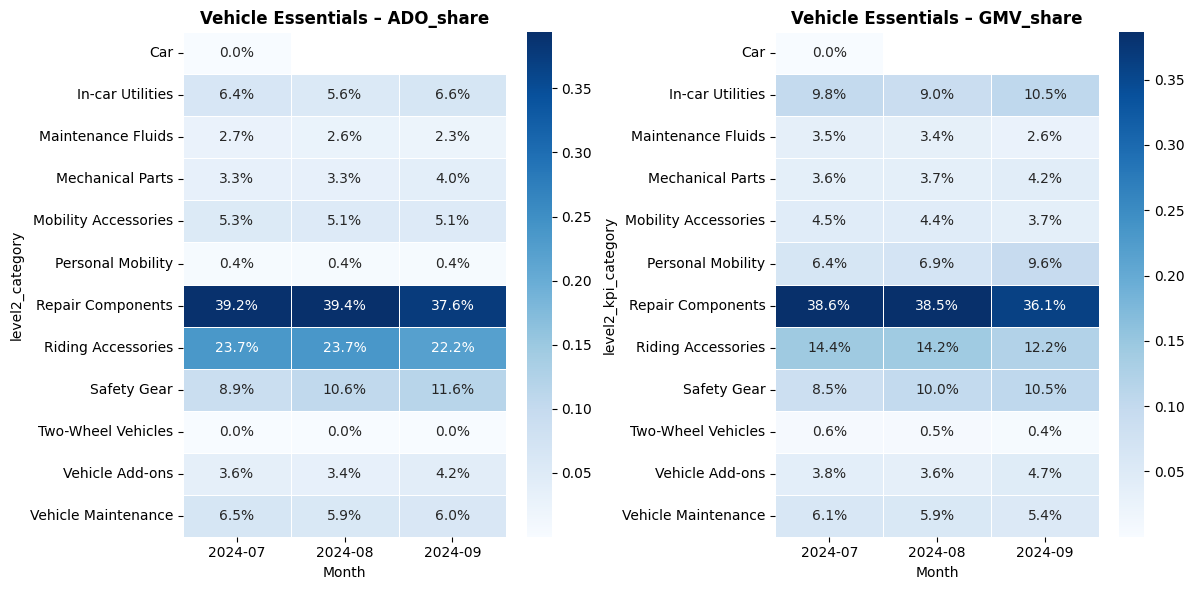

In [85]:
plot_heatmap_share(
    total_share,
    lv1='Vehicle Essentials'
)

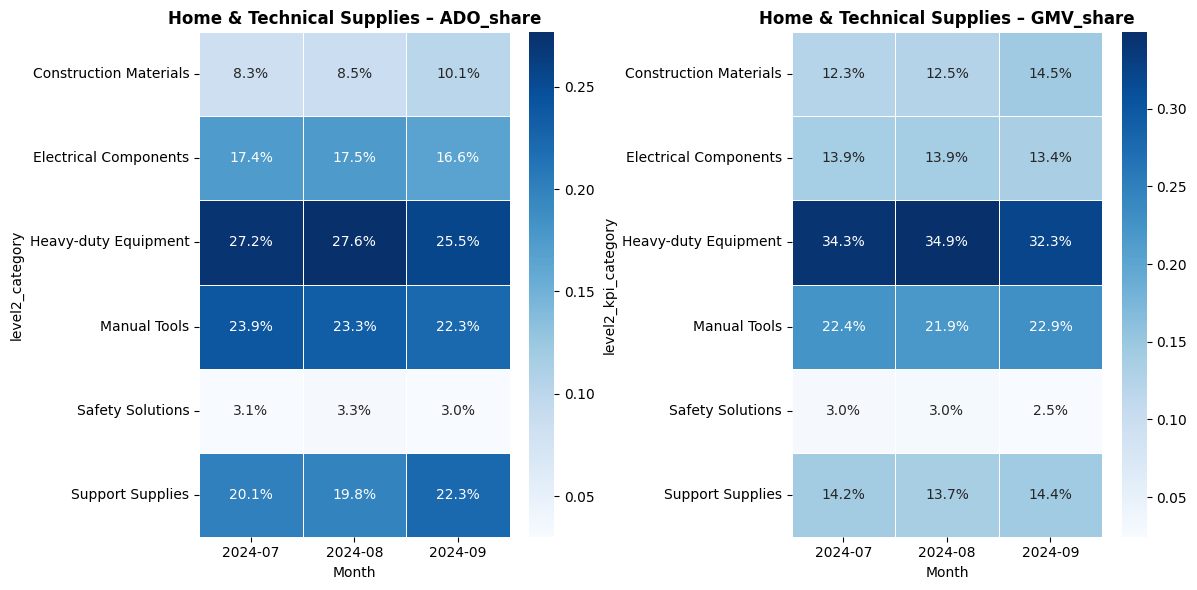

In [86]:
plot_heatmap_share(
    total_share,
    lv1='Home & Technical Supplies'
)

#### Tỷ trọng và tăng trưởng cao:

In [87]:
df_merge_share = pd.merge(
    total_share_cur,
    l1_L2_growth[['level2_kpi_category','diff_ado','diff_gmv','grow_ado','grow_gmv']],
    on = 'level2_kpi_category',
    how = 'left'

)
df_merge_share

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1,total_ado_share,total_gmv_share,ado_share,gmv_share,diff_ado,diff_gmv,grow_ado,grow_gmv
0,2024-09,Home & Technical Supplies,Support Supplies,3373.615984,15558.736710,2872.658502,13143.337034,15099.169643,107792.143755,0.223431,0.144340,500.957482,2415.399676,0.174388,0.183774
1,2024-09,Vehicle Essentials,Mechanical Parts,1257.305894,7570.014491,1017.154352,6403.356208,31641.407527,178283.670125,0.039736,0.042461,240.151542,1166.658283,0.236101,0.182195
2,2024-09,Vehicle Essentials,Vehicle Maintenance,1909.389789,9656.522330,1828.894378,10262.582355,31641.407527,178283.670125,0.060345,0.054164,80.495411,-606.060025,0.044013,-0.059055
3,2024-09,Vehicle Essentials,Maintenance Fluids,712.234388,4632.230317,804.932960,5937.830016,31641.407527,178283.670125,0.022510,0.025982,-92.698572,-1305.599699,-0.115163,-0.219878
4,2024-09,Vehicle Essentials,Mobility Accessories,1620.329208,6667.651448,1563.389860,7742.379013,31641.407527,178283.670125,0.051209,0.037399,56.939348,-1074.727565,0.036420,-0.138811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,2024-09,Home & Technical Supplies,Heavy-duty Equipment,3857.005408,34831.208751,4016.932791,33454.748639,15099.169643,107792.143755,0.255445,0.323133,-159.927383,1376.460112,-0.039813,0.041144
13,2024-09,Vehicle Essentials,Two-Wheel Vehicles,0.566667,716.843645,0.548388,824.516361,31641.407527,178283.670125,0.000018,0.004021,0.018279,-107.672716,0.033332,-0.130589
14,2024-09,Vehicle Essentials,Riding Accessories,7021.828669,21699.688309,7300.151734,24771.611622,31641.407527,178283.670125,0.221919,0.121714,-278.323065,-3071.923313,-0.038126,-0.124010
15,2024-09,Vehicle Essentials,Repair Components,11904.668096,64326.560118,12122.097972,67197.820063,31641.407527,178283.670125,0.376237,0.360810,-217.429876,-2871.259945,-0.017937,-0.042728


##### Hàm phân vị

In [88]:
# Hàm phân vị
def quantile_share_diff (df,lv1,metric):

  if metric == 'ado':
    share_col = 'ado_share'
    diff_col = 'diff_ado'
  elif metric == 'gmv':
    share_col = 'gmv_share'
    diff_col = 'diff_gmv'
  else:
    raise ValueError("Invalid metric. Must be 'ado' or 'gmv'.")

  df_lv1 = df[df['level1_kpi_category']== lv1]

  q_share = df_lv1[share_col].quantile(0.6)

  df_pos = df_lv1[df_lv1[diff_col]>0]
  if df_pos.empty:
        return pd.DataFrame(columns= df_lv1.columns)
  q_diff = df_pos[diff_col].quantile(0.6)

  df_quantile = df_lv1[
      (df_lv1[share_col]>= q_share)&
      (df_lv1[diff_col]>= q_diff)
  ]
  return df_quantile.reset_index(drop=True)

In [89]:
quantile_share_diff(df_merge_share,'Home & Technical Supplies','ado')

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1,total_ado_share,total_gmv_share,ado_share,gmv_share,diff_ado,diff_gmv,grow_ado,grow_gmv
0,2024-09,Home & Technical Supplies,Support Supplies,3373.615984,15558.73671,2872.658502,13143.337034,15099.169643,107792.143755,0.223431,0.14434,500.957482,2415.399676,0.174388,0.183774


In [90]:
quantile_share_diff(df_merge_share,'Vehicle Essentials','ado')

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1,total_ado_share,total_gmv_share,ado_share,gmv_share,diff_ado,diff_gmv,grow_ado,grow_gmv
0,2024-09,Vehicle Essentials,Safety Gear,3663.657544,18761.345137,3253.422925,17385.787129,31641.407527,178283.670125,0.115787,0.105233,410.234619,1375.558008,0.126093,0.079120
1,2024-09,Vehicle Essentials,In-car Utilities,2087.075546,18776.090594,1727.890254,15687.381033,31641.407527,178283.670125,0.065960,0.105316,359.185292,3088.709561,0.207875,0.196891


##### Text Insight

In [91]:
# Hàm phân vị cơ cấu và tăng trưởng cao
def quantile_share_diff (df,lv1):

  df_lv1 = df[df['level1_kpi_category']== lv1]

  lines = []
  lines.append(f"**{lv1}**")

#-------ADO

  q_share_ado = df_lv1['ado_share'].quantile(0.7)

  df_pos_ado = df_lv1[df_lv1['diff_ado']>0]
  if df_pos_ado.empty:
        return pd.DataFrame(columns= df_lv1.columns)
  q_diff_ado = df_pos_ado['diff_ado'].quantile(0.7)

  df_quantile_ado = df_lv1[
      (df_lv1['ado_share']>= q_share_ado)&
      (df_lv1['diff_ado']>= q_diff_ado)]

  # text
  quantile_ado_text = ", ".join(
        f"**{i['level2_kpi_category']}** (chiếm {i[('ado_share')]*100:.2f}% cơ cấu ADO "
        f"và tăng trưởng {i[('grow_ado')]*100:+.2f}% MoM )"
        for _, i in df_quantile_ado.iterrows()
    )
  lines.append(f"  - **ADO**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là {quantile_ado_text}.")
#-------GMV
  q_share_gmv = df_lv1['gmv_share'].quantile(0.7)

  df_pos_gmv = df_lv1[df_lv1['diff_gmv']>0]
  if df_pos_gmv.empty:
        return pd.DataFrame(columns= df_lv1.columns)
  q_diff_gmv = df_pos_gmv['diff_gmv'].quantile(0.7)

  df_quantile_gmv = df_lv1[
      (df_lv1['gmv_share']>= q_share_gmv)&
      (df_lv1['diff_gmv']>= q_diff_gmv)
  ]

  # text
  quantile_gmv_text = ", ".join(
        f"**{i['level2_kpi_category']}** (chiếm {i[('gmv_share')]*100:.2f}% cơ cấu GMV "
        f"và tăng trưởng {i[('grow_gmv')]*100:+.2f}% MoM )"
        for _, i in df_quantile_gmv.iterrows()
    )
  lines.append(f"  - **GMV**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là {quantile_gmv_text}.")
  return lines

In [92]:
quantile_share_diff(df_merge_share,'Home & Technical Supplies')

['**Home & Technical Supplies**',
 '  - **ADO**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là **Support Supplies** (chiếm 22.34% cơ cấu ADO và tăng trưởng +17.44% MoM ).',
 '  - **GMV**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là **Manual Tools** (chiếm 22.90% cơ cấu GMV và tăng trưởng +17.48% MoM ).']

In [93]:
quantile_share_diff(df_merge_share,'Vehicle Essentials')

['**Vehicle Essentials**',
 '  - **ADO**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là **Safety Gear** (chiếm 11.58% cơ cấu ADO và tăng trưởng +12.61% MoM ), **In-car Utilities** (chiếm 6.60% cơ cấu ADO và tăng trưởng +20.79% MoM ).',
 '  - **GMV**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là **In-car Utilities** (chiếm 10.53% cơ cấu GMV và tăng trưởng +19.69% MoM ).']

#### Tỷ trọng nhỏ, tăng trưởng tốt:

In [94]:
# Hàm phân vị tăng trưởng cao, cơ cấu nhỏ:
def quantile_share_diff_2 (df,lv1):

  df_lv1 = df[df['level1_kpi_category']== lv1]

  lines = []
  lines.append(f"**{lv1}**")

#-------ADO

  q_share_ado = df_lv1['ado_share'].quantile(0.7)

  #df_pos_ado = df_lv1[df_lv1['diff_ado']>0]
  #if df_pos_ado.empty:
  #     return pd.DataFrame(columns= df_lv1.columns)
  q_diff_ado = df_lv1['diff_ado'].quantile(0.7)

  df_quantile_ado = df_lv1[
      (df_lv1['ado_share'] < q_share_ado)&
      (df_lv1['diff_ado']>= q_diff_ado)]

  # text
  quantile_ado_text = ", ".join(
        f"**{i['level2_kpi_category']}** (chiếm {i[('ado_share')]*100:.2f}% cơ cấu ADO "
        f"và tăng trưởng {i[('grow_ado')]*100:+.2f}% MoM )"
        for _, i in df_quantile_ado.iterrows()
    )
  lines.append(f"  - **ADO**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là {quantile_ado_text}.")
#-------GMV
  q_share_gmv = df_lv1['gmv_share'].quantile(0.7)

  #df_pos_gmv = df_lv1[df_lv1['diff_gmv']>0]
  #if df_pos_gmv.empty:
  #     return pd.DataFrame(columns= df_lv1.columns)
  q_diff_gmv = df_lv1['diff_gmv'].quantile(0.7)

  df_quantile_gmv = df_lv1[
      (df_lv1['gmv_share']< q_share_gmv)&
      (df_lv1['diff_gmv']>= q_diff_gmv)
  ]

  # text
  quantile_gmv_text = ", ".join(
        f"**{i['level2_kpi_category']}** (chiếm {i[('gmv_share')]*100:.2f}% cơ cấu GMV "
        f"và tăng trưởng {i[('grow_gmv')]*100:+.2f}% MoM )"
        for _, i in df_quantile_gmv.iterrows()
    )
  lines.append(f"  - **GMV**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là {quantile_gmv_text}.")
  return lines

In [95]:
quantile_share_diff_2(df_merge_share,'Home & Technical Supplies')

['**Home & Technical Supplies**',
 '  - **ADO**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Construction Materials** (chiếm 10.13% cơ cấu ADO và tăng trưởng +23.44% MoM ).',
 '  - **GMV**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Construction Materials** (chiếm 14.53% cơ cấu GMV và tăng trưởng +31.11% MoM ).']

In [96]:
quantile_share_diff_2(df_merge_share,'Vehicle Essentials')

['**Vehicle Essentials**',
 '  - **ADO**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Mechanical Parts** (chiếm 3.97% cơ cấu ADO và tăng trưởng +23.61% MoM ), **Vehicle Add-ons** (chiếm 4.19% cơ cấu ADO và tăng trưởng +28.09% MoM ).',
 '  - **GMV**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Personal Mobility** (chiếm 9.63% cơ cấu GMV và tăng trưởng +42.02% MoM ), **Vehicle Add-ons** (chiếm 4.66% cơ cấu GMV và tăng trưởng +33.53% MoM ).']

#### Tỷ trọng cao, tăng trưởng âm:

In [97]:
# Hàm phân vị tăng trưởng cao, cơ cấu nhỏ:
def quantile_share_diff_3 (df,lv1):

  df_lv1 = df[df['level1_kpi_category']== lv1]

  lines = []
  lines.append(f"**{lv1}**")

#-------ADO

  q_share_ado = df_lv1['ado_share'].quantile(0.7)

  #df_pos_ado = df_lv1[df_lv1['diff_ado']>0]
  #if df_pos_ado.empty:
  #     return pd.DataFrame(columns= df_lv1.columns)
  q_diff_ado = df_lv1['diff_ado'].quantile(0.7)

  df_quantile_ado = df_lv1[
      (df_lv1['ado_share'] >= q_share_ado)&
      (df_lv1['diff_ado']< q_diff_ado)]

  # text
  quantile_ado_text = ", ".join(
        f"**{i['level2_kpi_category']}** (chiếm {i[('ado_share')]*100:.2f}% cơ cấu ADO "
        f"nhưng {i[('grow_ado')]*100:+.2f}% MoM )"
        for _, i in df_quantile_ado.iterrows()
    )
  lines.append(f"  - **ADO**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là {quantile_ado_text}.")
#-------GMV
  q_share_gmv = df_lv1['gmv_share'].quantile(0.7)

  #df_pos_gmv = df_lv1[df_lv1['diff_gmv']>0]
  #if df_pos_gmv.empty:
  #     return pd.DataFrame(columns= df_lv1.columns)
  q_diff_gmv = df_lv1['diff_gmv'].quantile(0.7)

  df_quantile_gmv = df_lv1[
      (df_lv1['gmv_share']>=q_share_gmv)&
      (df_lv1['diff_gmv']< q_diff_gmv)
  ]

  # text
  quantile_gmv_text = ", ".join(
        f"**{i['level2_kpi_category']}** (chiếm {i[('gmv_share')]*100:.2f}% cơ cấu GMV "
        f"nhưng {i[('grow_gmv')]*100:+.2f}% MoM )"
        for _, i in df_quantile_gmv.iterrows()
    )
  lines.append(f"  - **GMV**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là {quantile_gmv_text}.")
  return lines

In [98]:
quantile_share_diff_3(df_merge_share,'Home & Technical Supplies')

['**Home & Technical Supplies**',
 '  - **ADO**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Heavy-duty Equipment** (chiếm 25.54% cơ cấu ADO nhưng -3.98% MoM ).',
 '  - **GMV**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Heavy-duty Equipment** (chiếm 32.31% cơ cấu GMV nhưng +4.11% MoM ).']

In [99]:
quantile_share_diff_3(df_merge_share,'Vehicle Essentials')

['**Vehicle Essentials**',
 '  - **ADO**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Riding Accessories** (chiếm 22.19% cơ cấu ADO nhưng -3.81% MoM ), **Repair Components** (chiếm 37.62% cơ cấu ADO nhưng -1.79% MoM ).',
 '  - **GMV**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Riding Accessories** (chiếm 12.17% cơ cấu GMV nhưng -12.40% MoM ), **Repair Components** (chiếm 36.08% cơ cấu GMV nhưng -4.27% MoM ).']

### PHÂN TÍCH XU HƯỚNG

#### Theo ngành hàng cấp 2

In [100]:
# DF của last month
df_source_lv2_2 = df_source_lv2.copy()
#df_prev_lv2 = df_source_lv2_2[df_source_lv2_2['year_month']!= cur]
df_lv2_valid = df_source_lv2_2.dropna(subset=['ADO_M_1'])
df_lv2_valid

,year_month,level1_kpi_category,level2_kpi_category,ADO_M,AdGMV_M,ADO_M_1,AdGMV_M_1
1,2024-08,Home & Technical Supplies,Support Supplies,2872.658502,13143.337034,2888.468806,13209.874648
2,2024-09,Home & Technical Supplies,Support Supplies,3373.615984,15558.736710,2872.658502,13143.337034
4,2024-08,Vehicle Essentials,Mechanical Parts,1017.154352,6403.356208,942.304522,5881.293915
5,2024-09,Vehicle Essentials,Mechanical Parts,1257.305894,7570.014491,1017.154352,6403.356208
7,2024-08,Vehicle Essentials,Vehicle Maintenance,1828.894378,10262.582355,1854.358966,9847.321101
...,...,...,...,...,...,...,...
45,2024-09,Vehicle Essentials,Riding Accessories,7021.828669,21699.688309,7300.151734,24771.611622
47,2024-08,Vehicle Essentials,Repair Components,12122.097972,67197.820063,11202.591139,62584.391202
48,2024-09,Vehicle Essentials,Repair Components,11904.668096,64326.560118,12122.097972,67197.820063
50,2024-08,Home & Technical Supplies,Safety Solutions,482.955328,2908.470380,445.899070,2742.801371


In [101]:
df_lv2_gr_month= growth_by_mul_level(df_lv2_valid, ['year_month',CAT_LEVEL_MAP['L2'], CAT_LEVEL_MAP['L1']] )

In [102]:
df_lv2_gr_month.sort_values(by=['year_month','level1_kpi_category','level2_kpi_category'])

,diff_ado,diff_gmv,grow_ado,grow_gmv,ADO_M,ADO_M_1,AdGMV_M,AdGMV_M_1,year_month,level2_kpi_category,level1_kpi_category
0,38.677657,548.223744,0.032230,0.048090,1238.733533,1200.055876,11948.112695,11399.888951,2024-08,Construction Materials,Home & Technical Supplies
1,28.170015,508.242426,0.011232,0.039546,2536.234416,2508.064401,13360.015798,12851.773372,2024-08,Electrical Components,Home & Technical Supplies
2,98.157862,1626.141345,0.025048,0.051091,4016.932791,3918.774929,33454.748639,31828.607294,2024-08,Heavy-duty Equipment,Home & Technical Supplies
5,-62.048267,253.214137,-0.018019,0.012199,3381.508214,3443.556481,21010.957324,20757.743187,2024-08,Manual Tools,Home & Technical Supplies
12,37.056258,165.669009,0.083105,0.060401,482.955328,445.899070,2908.470380,2742.801371,2024-08,Safety Solutions,Home & Technical Supplies
...,...,...,...,...,...,...,...,...,...,...,...
27,-278.323065,-3071.923313,-0.038126,-0.124010,7021.828669,7300.151734,21699.688309,24771.611622,2024-09,Riding Accessories,Vehicle Essentials
28,410.234619,1375.558008,0.126093,0.079120,3663.657544,3253.422925,18761.345137,17385.787129,2024-09,Safety Gear,Vehicle Essentials
31,0.018279,-107.672716,0.033332,-0.130589,0.566667,0.548388,716.843645,824.516361,2024-09,Two-Wheel Vehicles,Vehicle Essentials
32,290.833185,2088.187566,0.280875,0.335255,1326.289140,1035.455955,8316.842392,6228.654826,2024-09,Vehicle Add-ons,Vehicle Essentials


##### Xu hướng tăng

In [103]:
df_check = (
    df_lv2_gr_month
    .pivot_table(
        index='level2_kpi_category',
        columns='year_month',
        values='diff_ado',
        aggfunc='sum'
    )
)
df_check

year_month,2024-08,2024-09
level2_kpi_category,,
Construction Materials,38.677657,290.342090
Electrical Components,28.170015,-24.213226
Heavy-duty Equipment,98.157862,-159.927383
In-car Utilities,-92.260149,359.185292
Maintenance Fluids,21.834976,-92.698572
...,...,...
Safety Solutions,37.056258,-25.699967
Support Supplies,-15.810304,500.957482
Two-Wheel Vehicles,0.161290,0.018279


In [104]:
# Hàm xu hướng tăng:
def trend_grow(df,lv1):
  lines =[]
  df_cat = df[df['level1_kpi_category']==lv1]
  lines.append(f"**{lv1}** \n\n")
  #----------ADO
  # Tạo pivot
  df_month_ado = (df_cat
                  .pivot_table(
                      index = 'level2_kpi_category',
                      columns = 'year_month',
                      values = 'diff_ado',
                      aggfunc = 'sum'
                  ))
  df_month_gmv = (df_cat
                  .pivot_table(
                      index = 'level2_kpi_category',
                      columns = 'year_month',
                      values = 'diff_gmv',
                      aggfunc = 'sum'
                  ))
  # Text
  ado_text =[]
  for lv2, row in df_month_ado.iterrows():
    if not (row.dropna()>0).all():
      continue
    note = [
        f"T{int(m.split('-')[1])} {row[m]:+.2f} ADO"
        for m in row.index
    ]
    ado_text.append(f"**{lv2}** ({', '.join(note)})")
  if ado_text:
    lines.append(
    f" - **ADO**: Ngành hàng có xu hướng tăng "
    f'{", ".join(ado_text)}.'
    )
  else:
    lines.append(
    f"**ADO**: Không có ngành hàng nào có xu hướng tăng."
    )
  #----------GMV
  gmv_text = []
  for lv2,row in df_month_gmv.iterrows():
    if not (row.dropna() >0).all():
      continue
    note_gmv = [
        f"T{int(m.split('-')[1])} {row[m]:+.2f} GMV"
        for m in row.index
    ]
    gmv_text.append(f"**{lv2}** ({', '.join(note_gmv)})")
  if gmv_text:
            lines.append(
            f" - **GMV**: Ngành hàng có xu hướng tăng "
            f'{", ".join(gmv_text)}.'
            )
  else:
            lines.append(
            f"**GMV**: Không có ngành hàng nào có xu hướng tăng."
            )
  return lines


In [105]:
trend_grow(df_lv2_gr_month,"Vehicle Essentials")

['**Vehicle Essentials** \n\n',
 ' - **ADO**: Ngành hàng có xu hướng tăng **Mechanical Parts** (T8 +74.85 ADO, T9 +240.15 ADO), **Mobility Accessories** (T8 +32.97 ADO, T9 +56.94 ADO), **Personal Mobility** (T8 +26.84 ADO, T9 +9.61 ADO), **Safety Gear** (T8 +696.89 ADO, T9 +410.23 ADO), **Two-Wheel Vehicles** (T8 +0.16 ADO, T9 +0.02 ADO).',
 ' - **GMV**: Ngành hàng có xu hướng tăng **Mechanical Parts** (T8 +522.06 GMV, T9 +1166.66 GMV), **Personal Mobility** (T8 +1663.79 GMV, T9 +5077.19 GMV), **Safety Gear** (T8 +3572.13 GMV, T9 +1375.56 GMV), **Vehicle Add-ons** (T8 +15.57 GMV, T9 +2088.19 GMV).']

In [106]:
trend_grow(df_lv2_gr_month,"Home & Technical Supplies")

['**Home & Technical Supplies** \n\n',
 ' - **ADO**: Ngành hàng có xu hướng tăng **Construction Materials** (T8 +38.68 ADO, T9 +290.34 ADO).',
 ' - **GMV**: Ngành hàng có xu hướng tăng **Construction Materials** (T8 +548.22 GMV, T9 +3716.92 GMV), **Electrical Components** (T8 +508.24 GMV, T9 +1050.87 GMV), **Heavy-duty Equipment** (T8 +1626.14 GMV, T9 +1376.46 GMV), **Manual Tools** (T8 +253.21 GMV, T9 +3672.84 GMV).']

##### Xu hướng giảm

In [107]:
# Hàm xu hướng giảm
def trend_down(df,lv1):
  lines = []
  df_cat = df[df['level1_kpi_category']==lv1]
  lines.append(f'**{lv1}** \n\n')

  #ADO
  df_month_ado = (df_cat
                  .pivot_table(
                      index ='level2_kpi_category',
                      columns = 'year_month',
                      values = 'diff_ado',
                      aggfunc='sum'
                  ))
  ado_text =[]
  for lv2,row in df_month_ado.iterrows():
    if not (row.dropna()<0).all():
      continue
    note = [
        f'T{int(m.split('-')[1])} {row[m]:+.2f} ADO'
        for m in row.index # lấy cột trong bảng pivot là các tháng
    ]
    ado_text.append(f"**{lv2}** ({', '.join(note)})")
  if ado_text:
    lines.append(
    f" - **ADO**: Ngành hàng có xu hướng giảm "
    f"{', '.join(ado_text)}.\n\n"
    )
  else:
    lines.append(
        f" - **ADO**: Không có ngành hàng nào có xu hướng giảm.\n\n"
    )
  # GMV
  df_month_gmv = (df_cat
                  .pivot_table(
                      index = 'level2_kpi_category',
                      columns= 'year_month',
                      values = 'diff_gmv',
                      aggfunc = 'sum'
                  ))
  gmv_text =[]
  for lv2, row in df_month_gmv.iterrows():
      if not (row.dropna()<0).all():
       continue
      note_gmv = [
          f'T{int(m.split("-")[1])} {row[m]:+.2f} GMV'
          for m in row.index
      ]
      gmv_text.append(f"**{lv2}** ({', '.join(note_gmv)})")

  #code
  if gmv_text:
    lines.append(
        f" - **GMV**: Ngành hàng có xu hướng giảm "
        f"{', '.join(gmv_text)}.\n\n "
    )
  else:
    lines.append(
         f" - **GMV**: Không có ngành hàng nào có xu hướng giảm. "
    )
  return lines

In [108]:
trend_down(df_lv2_gr_month,"Home & Technical Supplies")

['**Home & Technical Supplies** \n\n',
 ' - **ADO**: Ngành hàng có xu hướng giảm **Manual Tools** (T8 -62.05 ADO, T9 -11.31 ADO).\n\n',
 ' - **GMV**: Không có ngành hàng nào có xu hướng giảm. ']

In [109]:
trend_down(df_lv2_gr_month,"Vehicle Essentials")

['**Vehicle Essentials** \n\n',
 ' - **ADO**: Không có ngành hàng nào có xu hướng giảm.\n\n',
 ' - **GMV**: Ngành hàng có xu hướng giảm **Two-Wheel Vehicles** (T8 -83.40 GMV, T9 -107.67 GMV).\n\n ']

#### Theo sản phẩm:

##### Xu hướng giảm

In [110]:
# Bảng items nhiều tháng
items_source = df_source_items.copy()
items_source['keywords']= items_source['item_name'].apply(clean_and_shorten)

In [111]:
# bảng items tháng hiện tại
item_cur_df = item_df.copy()
item_cur_df

,year_month,level1_kpi_category,level2_kpi_category,item_name,ADO_M,ADO_M_1,AdGMV_M,AdGMV_M_1,keywords
1,2024-09,Vehicle Essentials,Riding Accessories,"Cốt chân phuộc winner, Sonic , exciter 135, ex...",0.003030,NaN,0.245127,NaN,cốt chân phuộc winner sonic
5,2024-09,Vehicle Essentials,Repair Components,cốt chống đứng bộ (2 cái) xe wave s110 rsx110 ...,0.066667,NaN,0.147100,NaN,cốt chống bộ xe wave
9,2024-09,Vehicle Essentials,Repair Components,"Cốt Chống Đứng CTS Xe VARIO , Air Blade 125 , ...",0.005556,0.064516,0.286732,0.391541,cốt chống cts xe vario
14,2024-09,Vehicle Essentials,Repair Components,Cốt chống đứng exciter 2006-2024 chính hãng YA...,0.108750,0.038710,0.596610,0.136859,cốt chống exciter 2006 yamaha
21,2024-09,Vehicle Essentials,Repair Components,cốt chống đứng khoe (bộ 2 cái) xe dream wave n...,0.167873,NaN,0.915617,NaN,cốt chống khoe xe dream
...,...,...,...,...,...,...,...,...,...
315030,2024-09,Home & Technical Supplies,Manual Tools,zoăng thay băng tan Phi 20-21 Phi 25-27 Không ...,0.309444,0.150538,1.147694,0.735789,zoăng băng tan phi 20
315031,2024-09,Home & Technical Supplies,Heavy-duty Equipment,zoăng thay băng tan Phi 20-21 Phi 25-27 Không ...,0.008333,0.309444,0.053330,1.147694,zoăng băng tan phi 20
315032,2024-09,Home & Technical Supplies,Manual Tools,Zoăng thay cho băng tan loại chịu nhiệt 21-27,0.038095,NaN,0.202288,NaN,zoăng băng tan chịu nhiệt
315035,2024-09,Home & Technical Supplies,Heavy-duty Equipment,ZOYI ZT S4 ĐỒNG HỒ ĐO VẠN NĂNG TỰ ĐỘNG,1.542503,0.914761,20.211469,12.026058,zoyi zt s4 đồng hồ


###### Lọc items giảm

In [112]:
### Hàm lọc bớt items diff<0
def items_keep (df,col):

  if col =='ado':
     col = 'ADO_M'
     col_M_1 = 'ADO_M_1'
     min_val = 0.05

  elif col =='gmv':
    col = 'AdGMV_M'
    col_M_1 = 'AdGMV_M_1'
    min_val = 1
  else:
    raise ValueError('must be ado or gmv')

 # lọc min
  df= df[df[col] > min_val].copy()

 # tính quantile và diff
  q_items = df[col].quantile(0.3)

  df['diff'] = df[col] - df[col_M_1]

  items_list = df[
      (df[col] >= q_items)
      |
      (df['diff'] <= 0)
  ]['keywords'].unique()

  #df_items = df.loc[df['keywords'].isin(items_list)].copy()

  return items_list

In [113]:
# Hàm total share
def total_share_items (df,col):
  if col == 'ado':
     col = 'ADO_M'
     col_m1 = 'ADO_M_1'
     col_share = 'share_ado'
  elif col == 'gmv':
       col = 'AdGMV_M'
       col_m1 = 'AdGMV_M_1'
       col_share = 'share_gmv'
  else:
    raise ValueError('metric must be ado or gmv')

  df = df.copy()
  df['total'] = (df
                 .groupby(['year_month','level2_kpi_category'])[col]
                 .transform('sum')
                )
  df[col_share] = df[col]/df['total']
  return df

######Tạo bảng theo ADO và GMV

In [114]:
# bảng ADO

In [115]:
# list items ado sau lọc
items_keep_ado = items_keep(item_cur_df,'ado')

In [116]:
# DF items ado 3 tháng
items_ado_month = items_source.loc[items_source['keywords'].isin(items_keep_ado)].copy()

In [117]:
# bảng diff ado
df_items_diff_ado = growth_by_mul_level(items_ado_month, ['year_month','keywords'])

In [118]:
# Bảng Total share theo ado
df_items_share_ado = total_share_items(items_ado_month,'ado')

In [119]:
# bảng GMV

In [120]:
# Items list gmv sau lọc
items_keep_gmv = items_keep(item_cur_df,'gmv')

In [121]:
# DF items gmv 3 tháng
items_gmv_month = items_source.loc[items_source['keywords'].isin(items_keep_gmv)].copy()

In [122]:
# bảng diff theo gmv
df_items_diff_gmv = growth_by_mul_level(items_gmv_month, ['year_month','keywords'])

In [123]:
# Bảng Total share theo gmv
df_items_share_gmv = total_share_items(items_gmv_month,'gmv')

###### Hàm xu hướng giảm

In [124]:
# Hàm lọc items có xu hướng giảm:
def items_trend_down (df_items_diff,df_items_share,metric):

  if metric =='ado':
    diff_col = 'diff_ado'
    share_col = 'share_ado'
  elif metric =='gmv':
    diff_col = 'diff_gmv'
    share_col = 'share_gmv'
  else:
    raise ValueError('metric must be ado or gmv')

  # bảng pivot diff theo tháng
  pivot_grow = (df_items_diff
                .pivot_table(
                    index = 'keywords',
                    columns='year_month',
                    values = diff_col,
                    aggfunc='sum'
                )
                .sort_index(axis=1)
  )

  month_cols = pivot_grow.columns[1:].tolist()
  pivot_grow = (pivot_grow[month_cols].reset_index())

  # bảng pivot share theo tháng
  pivot_share  = (df_items_share
                .pivot_table(
                    index = ['level1_kpi_category','level2_kpi_category','keywords'],
                    columns='year_month',
                    values = share_col,
                    aggfunc='sum'
                )
  )

  #Lấy cột max_share
  share_base_df = (
        pivot_share
        .iloc[:, -3:]
        .max(axis=1)
        .rename('share_max_3m')
        .reset_index()
    )
  # Gộp hai bảng lại
  share_diff_df =  pivot_grow.merge(
                    share_base_df,
                    on ='keywords',
                    how='inner'
  )
  month_cols = [
        c for c in share_diff_df.columns
        if c not in ['keywords', 'level2_kpi_category', 'share_max_3m','level1_kpi_category']
    ]

  # Tính decline
  share_diff_df= share_diff_df.assign(
      decline_score = share_diff_df[month_cols].abs().sum(axis=1)
  )

  # Tính quantile
  q_share = share_diff_df['share_max_3m'].quantile(0.7)
  q_decline = share_diff_df['decline_score'].quantile(0.7)

  # lọc qua các điều kiện
  df_keep = share_diff_df[
      (share_diff_df['share_max_3m']>q_share) &
      (share_diff_df[month_cols]<0).all(axis=1) &
      (share_diff_df['decline_score']>q_decline)
  ]

  result = (df_keep
            .sort_values(['level2_kpi_category','decline_score'],ascending=[True,False])
            .groupby('level2_kpi_category')
            .head(5)
  )

  return result[
    ['level1_kpi_category','level2_kpi_category','keywords', 'share_max_3m', 'decline_score']
      ]

In [125]:
# Sản phẩm có xu hướng giảm ado
items_trend_down_ado = items_trend_down(df_items_diff= df_items_diff_ado, df_items_share= df_items_share_ado ,metric='ado')
items_trend_down_ado

,level1_kpi_category,level2_kpi_category,keywords,share_max_3m,decline_score
33257,Home & Technical Supplies,Construction Materials,xe kéo đi chợ thị,0.009436,7.872043
19091,Home & Technical Supplies,Construction Materials,lưới nắng 90 may đóng,0.011134,6.963755
36566,Home & Technical Supplies,Construction Materials,đầu vòi bồn chén tăng,0.007044,6.459334
3245,Home & Technical Supplies,Construction Materials,bạt nắng mưa trời đa,0.010455,5.641129
33259,Home & Technical Supplies,Construction Materials,xe kéo đi thị chợ,0.005570,4.143010
...,...,...,...,...,...
16079,Vehicle Essentials,Vehicle Maintenance,kem autosol metal polish dùng,0.023147,23.518357
32753,Vehicle Essentials,Vehicle Maintenance,vết ố kính vế bẩn,0.010219,13.584864
6821,Vehicle Essentials,Vehicle Maintenance,cana mờ vết xước,0.007642,10.587146
17132,Vehicle Essentials,Vehicle Maintenance,khăn lau 2 mặt ô,0.022558,8.294034


In [126]:
# Sản phẩm có xu hướng giảm gmv
items_trend_down_gmv = items_trend_down(df_items_diff= df_items_diff_gmv, df_items_share= df_items_share_gmv ,metric='gmv')
items_trend_down_gmv

,level1_kpi_category,level2_kpi_category,keywords,share_max_3m,decline_score
16411,Home & Technical Supplies,Construction Materials,thang nhôm rút chữ a,0.025169,108.988132
18403,Home & Technical Supplies,Construction Materials,xe kéo đi chợ thị,0.010231,83.751752
16413,Home & Technical Supplies,Construction Materials,thang nhôm rút jiroshi nhật,0.018718,66.687887
9480,Home & Technical Supplies,Construction Materials,kích kê gạch nâng lát,0.003920,53.122354
18404,Home & Technical Supplies,Construction Materials,xe kéo đi thị chợ,0.005847,42.396613
...,...,...,...,...,...
8543,Vehicle Essentials,Vehicle Maintenance,kem autosol metal polish dùng,0.012794,52.695123
9702,Vehicle Essentials,Vehicle Maintenance,kính ô tô sunnyclean,0.047453,50.677676
3624,Vehicle Essentials,Vehicle Maintenance,cana mờ vết xước,0.005128,31.793585
9133,Vehicle Essentials,Vehicle Maintenance,khăn lau ô tô xe,0.016564,26.637712


##### Xu hướng tăng

###### Lọc items tăng

In [127]:
# Hàm lọc bớt items diff>0 và items_list
def items_keep_grow (df,col):

  if col =='ado':
     col = 'ADO_M'
     col_M_1 = 'ADO_M_1'
     min_val = 0.05

  elif col =='gmv':
    col = 'AdGMV_M'
    col_M_1 = 'AdGMV_M_1'
    min_val = 1
  else:
    raise ValueError('must be ado or gmv')

 # lọc min
  df= df[df[col] > min_val].copy()

 # tính quantile và diff
  q_items = df[col].quantile(0.3)

  df['diff'] = df[col] - df[col_M_1]

  items_list = df[
      (df[col] >= q_items)
      |
      (df['diff'] >= 0)
  ]['keywords'].unique()

  #df_items = df.loc[df['keywords'].isin(items_list)].copy()

  return items_list

######Tạo bảng ADO/GMV

In [128]:
# Bảng ADO

In [129]:
# list items ado sau lọc
items_keep_ado_grow = items_keep_grow(item_cur_df,'ado')

In [130]:
# DF items ado 3 tháng
items_ado_grow_month = items_source.loc[items_source['keywords'].isin(items_keep_ado_grow)].copy()

In [131]:
# bảng diff ado
df_items_grow_diff_ado = growth_by_mul_level(items_ado_grow_month, ['year_month','keywords'])

In [132]:
# Bảng Total share theo ado
df_items_share_ado_grow = total_share_items(items_ado_grow_month,'ado')

In [133]:
# Bảng GMV

In [134]:
# list items gmv sau lọc
items_keep_gmv_grow = items_keep_grow(item_cur_df,'gmv')

In [135]:
# DF items gmv 3 tháng
items_gmv_grow_month = items_source.loc[items_source['keywords'].isin(items_keep_gmv_grow)].copy()

In [136]:
# bảng diff gmv
df_items_grow_diff_gmv = growth_by_mul_level(items_gmv_grow_month, ['year_month','keywords'])

In [137]:
# Bảng Total share theo ado
df_items_share_gmv_grow = total_share_items(items_gmv_grow_month,'gmv')

###### Hàm xu hướng tăng

In [138]:
# Hàm lọc items có xu hướng tăng:
def items_trend_grow (df_items_diff,df_items_share,metric):
  if metric =='ado':
    diff_col = 'diff_ado'
    share_col = 'share_ado'
  elif metric =='gmv':
    diff_col = 'diff_gmv'
    share_col = 'share_gmv'
  else:
    raise ValueError('metric must be ado or gmv')
  # bảng pivot diff theo tháng
  pivot_diff = (df_items_diff
                .pivot_table(
                    index = 'keywords',
                    columns='year_month',
                    values = diff_col,
                    aggfunc='sum'
                )
  )
  month_cols = pivot_diff.columns[1:].tolist()
  pivot_diff = (pivot_diff[month_cols].reset_index())

  # bảng pivot share theo tháng
  pivot_share  = (df_items_share
                .pivot_table(
                    index = ['keywords','level2_kpi_category','level1_kpi_category'],
                    columns='year_month',
                    values = share_col,
                    aggfunc='sum'
                )
  )

  #Lấy cột max_share
  share_base_df = (
                   pivot_share.iloc[:,-3:].max(axis=1)
                   .rename('share_max_3m')
                   .reset_index()
                  )

  # Gộp hai bảng lại
  share_diff_df =  pivot_diff.merge(
                    share_base_df,
                    on ='keywords',
                    how='inner'
  )
  month_cols=[
        c for c in share_diff_df.columns
        if c not in ['keywords','level2_kpi_category','share_max_3m','level1_kpi_category']
  ]

  # Tính increase
  share_diff_df= share_diff_df.assign(
      increase_score = share_diff_df[month_cols].abs().sum(axis=1)
  )

  # Tính quantile
  q_share = share_diff_df['share_max_3m'].quantile(0.7)
  q_increase = share_diff_df['increase_score'].quantile(0.7)

  # lọc qua các điều kiện
  df_keep = share_diff_df[
      (share_diff_df['share_max_3m']>q_share) &
      (share_diff_df[month_cols]>0).all(axis=1) &
      (share_diff_df['increase_score']>q_increase)
  ]

  result = (df_keep
            .sort_values(['level2_kpi_category','increase_score'],ascending=[True,False])
            .groupby('level2_kpi_category')
            .head(5)
  )
  return result[
    ['level1_kpi_category','level2_kpi_category','keywords', 'share_max_3m', 'increase_score']
]

In [139]:
# Sản phẩm xu hướng tăng ado
items_trend_grow_ado = items_trend_grow(df_items_diff= df_items_grow_diff_ado, df_items_share= df_items_share_ado_grow ,metric='ado')

In [140]:
# Sản phẩm xu hướng tăng gmv
items_trend_grow_gmv = items_trend_grow(df_items_diff= df_items_grow_diff_gmv, df_items_share= df_items_share_gmv_grow ,metric='gmv')

##### Hàm format bảng

In [141]:
def table_view_grow (df):
  df_table = (
    df
    .assign(
        product_with_diff=lambda x:
        x['keywords'] + " (" + x['increase_score'].apply(format_num) + ")"
    )
    .groupby(['level1_kpi_category','level2_kpi_category'])['product_with_diff']
    .apply(lambda x: ", ".join(x))
    .reset_index()
    .sort_values(['level1_kpi_category','level2_kpi_category'],ascending=[True,True])
    )

  df_table.columns = ['Level 1','Level 2', 'Sản phẩm tiêu biểu| ΔADO lũy kế']

  # format bảng
  result = (
    df_table
    .style
    .set_properties(**{
        'white-space': 'pre-wrap',
        'text-align': 'left',
        'vertical-align': 'top',
        'border': '1px solid #ccc'
    })
    .set_table_styles([
        {'selector': 'th', 'props': [
            ('border', '1px solid #ccc'),
            ('background-color', '#f2f2f2'),
            ('font-weight', 'bold'),
            ('text-align', 'center')
        ]},
        {'selector': 'td', 'props': [
            ('border', '1px solid #ccc'),
            ('padding', '8px')
        ]}
    ])
    )
  return result

In [142]:
def table_view_down (df):
  df_table = (
    df
    .assign(
        product_with_diff=lambda x:
        x['keywords'] + " (" + x['decline_score'].apply(format_num) + ")"
    )
    .groupby(['level1_kpi_category','level2_kpi_category'])['product_with_diff']
    .apply(lambda x: ", ".join(x))
    .reset_index()
    .sort_values(by=['level1_kpi_category','level2_kpi_category'],ascending=[True, True])
    )

  df_table.columns = ['Level 1','Level 2', 'Sản phẩm tiêu biểu| ΔADO lũy kế']

  # format bảng
  result = (
    df_table
    .style
    .set_properties(**{
        'white-space': 'pre-wrap',
        'text-align': 'left',
        'vertical-align': 'top',
        'border': '1px solid #ccc'
    })
    .set_table_styles([
        {'selector': 'th', 'props': [
            ('border', '1px solid #ccc'),
            ('background-color', '#f2f2f2'),
            ('font-weight', 'bold'),
            ('text-align', 'center')
        ]},
        {'selector': 'td', 'props': [
            ('border', '1px solid #ccc'),
            ('padding', '8px')
        ]}
    ])
    )
  return result

In [143]:
table_view_grow(items_trend_grow_ado)

,Level 1,Level 2,Sản phẩm tiêu biểu| ΔADO lũy kế
0,Home & Technical Supplies,Construction Materials,"sơn mạ crom chrome sáng (+15), combo 1 36 sàn nhựa (+14), xe đẩy hàng 4 bánh (+10), vòi bát inox 304 bồn (+9), máy phun sơn cầm tay (+9)"
1,Home & Technical Supplies,Electrical Components,"công tắc bập bênh kcd1 (+30), mạch sạc pin tp4056 cổng (+20), bộ tua vít đa năng (+19), ổ cắm điện đa năng (+19), ổ cắm điện usb đa (+17)"
2,Home & Technical Supplies,Heavy-duty Equipment,"công tắc bập bênh kcd1 (+30), bộ tua vít đa năng (+19), thân máy mài chân pin (+18), thiếc hàn 63a 63 đường (+15), đỡ máy cắt cầm tay (+12)"
3,Home & Technical Supplies,Manual Tools,"cờ lê đa năng vặn (+27), bộ tua vít đa năng (+19), nắp chặn lỗ cống thoát (+15), máy siết bulong pin workfix (+14), thân máy siết bulong hitachi (+14)"
4,Home & Technical Supplies,Safety Solutions,"khoá dây cáp chống cắt (+14), khóa ổ chống cắt circle (+13), khóa đồng 3p 4p 5p (+5), két sắt hình quyển sách (+5), chốt khóa inox 90 180 (+4)"
5,Home & Technical Supplies,Support Supplies,"bộ sạc 4 pin aa (+86), keo dính đa năng mạnh (+66), pin cmos 2032 3v panasonic (+41), pin sạc lithium 18650 6800mah (+32), thước gofuther 3m 5m 7 (+29)"
6,Vehicle Essentials,In-car Utilities,"bộ mô hình 6 con (+21), rèm nắng ô tô chắn (+17), ổ cắm nguồn đầu tẩu (+16), bọc vô lăng ô tô (+14), thảm lót cốp xe ô (+13)"
7,Vehicle Essentials,Maintenance Fluids,"hòa dyramid xăng con vệ (+43), nhớt fuchs silkolene pro 4 (+8), dung dịch vệ sinh buồng (+8), nhớt xe máy tora 20w50 (+6), nhớt tổng hợp kixx ultra (+5)"
8,Vehicle Essentials,Mechanical Parts,"đèn trợ sáng bi cầu (+191), xi nhan chữ z trung (+131), 01 dây đèn led mí (+51), sạc ắc quy ô tô (+30), đèn led pha bi cầu (+30)"
9,Vehicle Essentials,Mobility Accessories,"đèn trợ sáng xe máy (+55), bơm xe đạp áp suất (+34), đèn xe đạp thể thao (+25), bi sắt xe đạp 6 (+21), bộ tua vít đa năng (+19)"


In [144]:
table_view_grow(items_trend_grow_gmv)

,Level 1,Level 2,Sản phẩm tiêu biểu| ΔADO lũy kế
0,Home & Technical Supplies,Construction Materials,"combo 1 36 sàn nhựa (+368), xe đẩy hàng 4 bánh (+292), xi măng dẻo bịt lỗ (+155), sàn nhựa giả gỗ keo (+154), máy phun sơn cầm tay (+149)"
1,Home & Technical Supplies,Electrical Components,"ổ cắm điện đa năng (+72), ổ cắm điện usb đa (+45), ic votol 7280s em80s xe (+44), công tắc cảm biến dòng (+40), dây chịu nhiệt awg vỏ (+30)"
2,Home & Technical Supplies,Heavy-duty Equipment,"máy hàn mig 3 chức (+263), thân máy mài chân pin (+221), máy hàn mig không dùng (+183), máy hàn điện tử mma450 (+134), máy cưa xích 12in wf (+113)"
3,Home & Technical Supplies,Manual Tools,"máy khoan đục bê tông (+420), máy siết bulong pin workfix (+294), máy siết bulong pin drama (+246), thân máy siết bulong hitachi (+166), máy khoan pin 35 cấp (+132)"
4,Home & Technical Supplies,Safety Solutions,"khóa ổ chống cắt circle (+44), két sắt hình quyển sách (+41), khóa đồng 3p 4p 5p (+37), cầu cháy xfztbl6 bột abc (+30), khoá dây cáp chống cắt (+27)"
5,Home & Technical Supplies,Support Supplies,"bộ sạc 4 pin aa (+671), năng lượng mặt trời mono (+412), xi măng dẻo bịt lỗ (+155), thước gofuther 3m 5m 7 (+124), pin sạc aa aaa beston (+117)"
6,Vehicle Essentials,In-car Utilities,"camera hành trình 70mai dash (+434), thảm lót sàn nhựa 5d (+327), camera hành trình 70mai a500s (+199), thảm lót cốp xe ô (+196), lót ghế ô tô hạt (+167)"
7,Vehicle Essentials,Maintenance Fluids,"nhớt fuchs silkolene pro 4 (+104), hòa dyramid xăng con vệ (+93), nhớt motul 7100 10w40 1l (+48), bậc nẹp bước chân xe (+41), nhớt tổng hợp kixx ultra (+41)"
8,Vehicle Essentials,Mechanical Parts,"đèn trợ sáng bi cầu (+466), sạc ắc quy ô tô (+304), ắc quy khô bảo dưỡng (+282), đèn pha led bi cầu (+240), xi nhan chữ z trung (+212)"
9,Vehicle Essentials,Mobility Accessories,"ic đúc 1500w bản mạnh (+132), sạc xe đạp điện máy (+107), bi sắt xe đạp 6 (+97), đèn xe đạp thể thao (+88), khoá dây 5 số xe (+57)"


In [145]:
table_view_down(items_trend_down_ado)

,Level 1,Level 2,Sản phẩm tiêu biểu| ΔADO lũy kế
0,Home & Technical Supplies,Construction Materials,"xe kéo đi chợ thị (+8), lưới nắng 90 may đóng (+7), đầu vòi bồn chén tăng (+6), bạt nắng mưa trời đa (+6), xe kéo đi thị chợ (+4)"
1,Home & Technical Supplies,Electrical Components,"tụ quạt 400v các 1uf (+9), ống silicon dẻo chịu nhiệt (+8), công tắc hẹn giờ thông (+6), bộ công tắc hẹn giờ (+6), bộ điều khiển công tắc (+4)"
2,Home & Technical Supplies,Heavy-duty Equipment,"ê tô kẹp bàn vật (+11), dây xe 10m 15 20 (+9), thiếc hàn nhựa thông sn60 (+8), ống xoắn pu jisan hàn (+8), đầu bơm máy xe áp (+7)"
3,Home & Technical Supplies,Manual Tools,"ống silicon dẻo chịu nhiệt (+8), máy khoan pin đầu kẹp (+6), bộ 3 mũi khoan bước (+6), búa cao su đa năng (+6), búa đa năng cầm tay (+5)"
4,Home & Technical Supplies,Safety Solutions,"combo 2 cháy 4kg cứu (+3), chốt tự đóng inox 304 (+1), két sắt điện tử xiaomi (+1), combo hai cháy có đồng (+1), cháy bột abc 4kg cứu (+1)"
5,Home & Technical Supplies,Support Supplies,"keo đa năng dính nhựa (+14), keo bọt nở xốp foam (+10), keo nến chất lượng cao (+10), 40 toshiba aaa gắn remote (+7), keo vải uhu nhanh khô (+6)"
6,Vehicle Essentials,In-car Utilities,"rèm nắng theo xe hút (+7), sáp thơm areon car247 ken (+5), thảm taplo da cacbon ô (+4), đệm ô tô nệm xe (+4), rèm nắng xe ô tô (+3)"
7,Vehicle Essentials,Maintenance Fluids,"dầu nhớt xe tay ga (+11), vệ sinh sên xích bảo (+9), dầu nhớt xe số motul (+4), dung dịch mát động cơ (+4), combo nhớt máy láp shell (+4)"
8,Vehicle Essentials,Mechanical Parts,"dây led audi chạy hiệu (+5), đèn led cảnh báo nguy (+3), bộ 2 kẹp ắc quy (+2), cáp đấu trực tiếp điện (+2), bộ vá lốp không săm (+2)"
9,Vehicle Essentials,Mobility Accessories,"yên xe đạp thể thao (+9), 700 bi 7mm chống rỉ (+8), bánh xe đạp trẻ em (+4), đổi nguồn từ 36v 72v (+3), yên xe đạp active chống (+3)"


In [146]:
table_view_down(items_trend_down_gmv)

,Level 1,Level 2,Sản phẩm tiêu biểu| ΔADO lũy kế
0,Home & Technical Supplies,Construction Materials,"thang nhôm rút chữ a (+109), xe kéo đi chợ thị (+84), thang nhôm rút jiroshi nhật (+67), kích kê gạch nâng lát (+53), xe kéo đi thị chợ (+42)"
1,Home & Technical Supplies,Electrical Components,"combo bộ chuyển đổi 2 (+74), bộ công tắc hẹn giờ (+42), bộ chuyển nguồn điện ats (+35), ổ cắm điện quang 4 (+29), khởi động từ 1 pha (+25)"
2,Home & Technical Supplies,Heavy-duty Equipment,"máy không dầu 24l 600w (+91), combo bộ chuyển đổi 2 (+74), máy xe xpower rx 3a (+72), máy hàn mig forton 270 (+67), đầu bơm máy xe áp (+51)"
3,Home & Technical Supplies,Manual Tools,"máy khoan tường bê tông (+176), máy khoan pin đầu kẹp (+101), khoan 3 chức năng có (+66), máy siết bulong workfix wf (+58), kích kê gạch nâng lát (+53)"
4,Home & Technical Supplies,Safety Solutions,"két sắt điện tử xiaomi (+107), combo 2 cháy 4kg cứu (+64), combo hai cháy có đồng (+26), combo 2 cháy bột abc (+12), cháy bột abc 4kg cứu (+12)"
5,Home & Technical Supplies,Support Supplies,"máy siết bulong workfix wf (+58), keo nến chất lượng cao (+49), keo bọt nở xốp foam (+42), màng co nhiệt pvc kích (+37), bộ 20kg keo ab cứng (+34)"
6,Vehicle Essentials,In-car Utilities,"rèm nắng theo xe hút (+61), đệm ô tô nệm xe (+45), rèm nắng xe ô tô (+34), giường đệm gấp gọn xe (+30), nệm để xe ô tô (+27)"
7,Vehicle Essentials,Maintenance Fluids,"dầu nhớt xe tay ga (+77), vệ sinh sên xích bảo (+31), combo nhớt máy láp shell (+28), 1 12 nhớt tổng hợp (+27), dầu nhớt xe số motul (+26)"
8,Vehicle Essentials,Mechanical Parts,"đèn led cảnh báo nguy (+24), ty thủy lực ben dài (+17), gạt mưa xe ô tô (+13), dây led audi chạy hiệu (+12), gạt mưa xương phổ thông (+8)"
9,Vehicle Essentials,Mobility Accessories,"bộ tay lắc l twoo (+321), yên xe đạp thể thao (+37), bơm xe đạp chân kirito (+16), ic đúc 1200w 48v 72v (+16), yên xe đạp active chống (+15)"


# Báo cáo Nhanh Ngành Hàng


## PHẦN 1: TỔNG QUAN 




 
 Ngành hàng **Auto & Tools** tháng 9 so với tháng 8 tăng +1,429 về ADO (+6.71% MoM) và tăng +15,726 về GMV (+14.64% MoM).


**Trong đó:**

- **Home & Technical Supplies**: **ADO** tăng +570 (+3.92% MoM), **GMV** tăng +11,967 (+12.49% MoM).

- **Vehicle Essentials**: **ADO** tăng +859 (+2.79% MoM), **GMV** tăng +3,759 (+2.15% MoM).



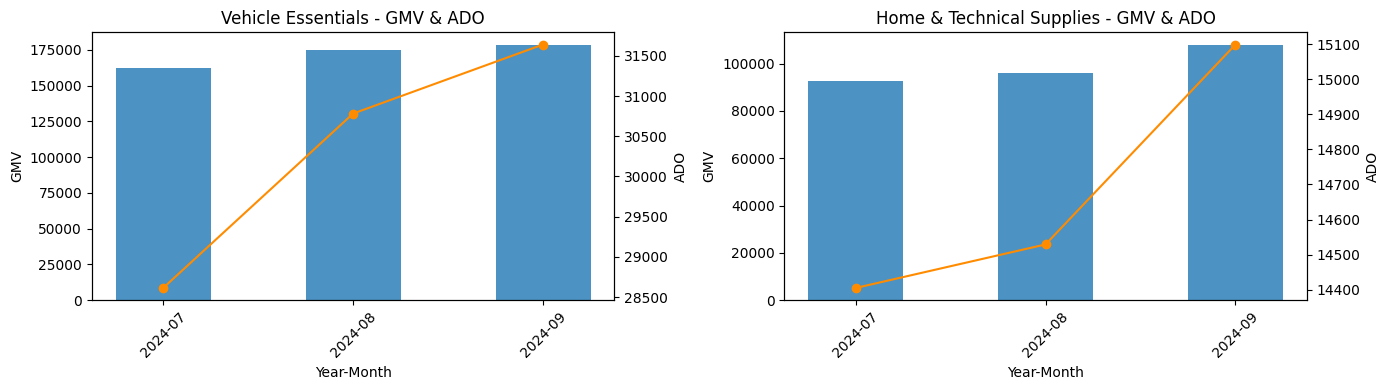

## PHẦN 2: PHÂN TÍCH ĐỘNG LỰC TĂNG TRƯỞNG 



### 2.1 Các ngành hàng đóng góp tăng trưởng chính:



**Về Vehicle Essentials**
 
- **ADO**: Tăng trưởng chủ yếu đến từ các ngành hàng  **Safety Gear, In-car Utilities, Vehicle Add-ons**, đóng góp 123.4% tổng mức tăng. Một số sản phẩm tiêu biểu như: 
 

 
  - **Safety Gear**: **mũ bảo hiểm nửa đầu** (+236.23 ADO), **mũ bảo hiểm lưỡi trai** (+124.08 ADO), **mũ bảo hiểm đai da** (+92.93 ADO)
 
  - **In-car Utilities**: **đỡ điện thoại ô tô** (+36.14 ADO), **bảng số điện thoại ô** (+31.69 ADO), **thảm lót sàn cao su** (+22.32 ADO)
 
  - **Vehicle Add-ons**: **combo 4 nắp van bánh** (+23.31 ADO), **nẹp decal bậc xe ô** (+22.23 ADO), **bộ khung biển số mica** (+20.87 ADO)
 

- **GMV**: Tăng trưởng chủ yếu đến từ nhóm (**Personal Mobility, In-car Utilities, Vehicle Add-ons**), đóng góp 272.8% tổng mức tăng. Một số sản phẩm tiêu biểu như:
 

 
  - **In-car Utilities**: **thảm lót sàn ô tô** (+1407.73 GMV), **màn hình android ô tô** (+930.21 GMV), **thảm lót sàn cao su** (+376.56 GMV)
 
  - **Personal Mobility**: **xe đạp điện học sinh** (+1328.61 GMV), **xe đạp điện moka niceshine** (+795.04 GMV), **xe điện 3 bánh super** (+684.49 GMV)
 
  - **Vehicle Add-ons**: **quây chống chuột xe ô** (+491.23 GMV), **quây chống chuột rào chắn** (+173.45 GMV), **bạt phủ ô tô xe** (+123.68 GMV)

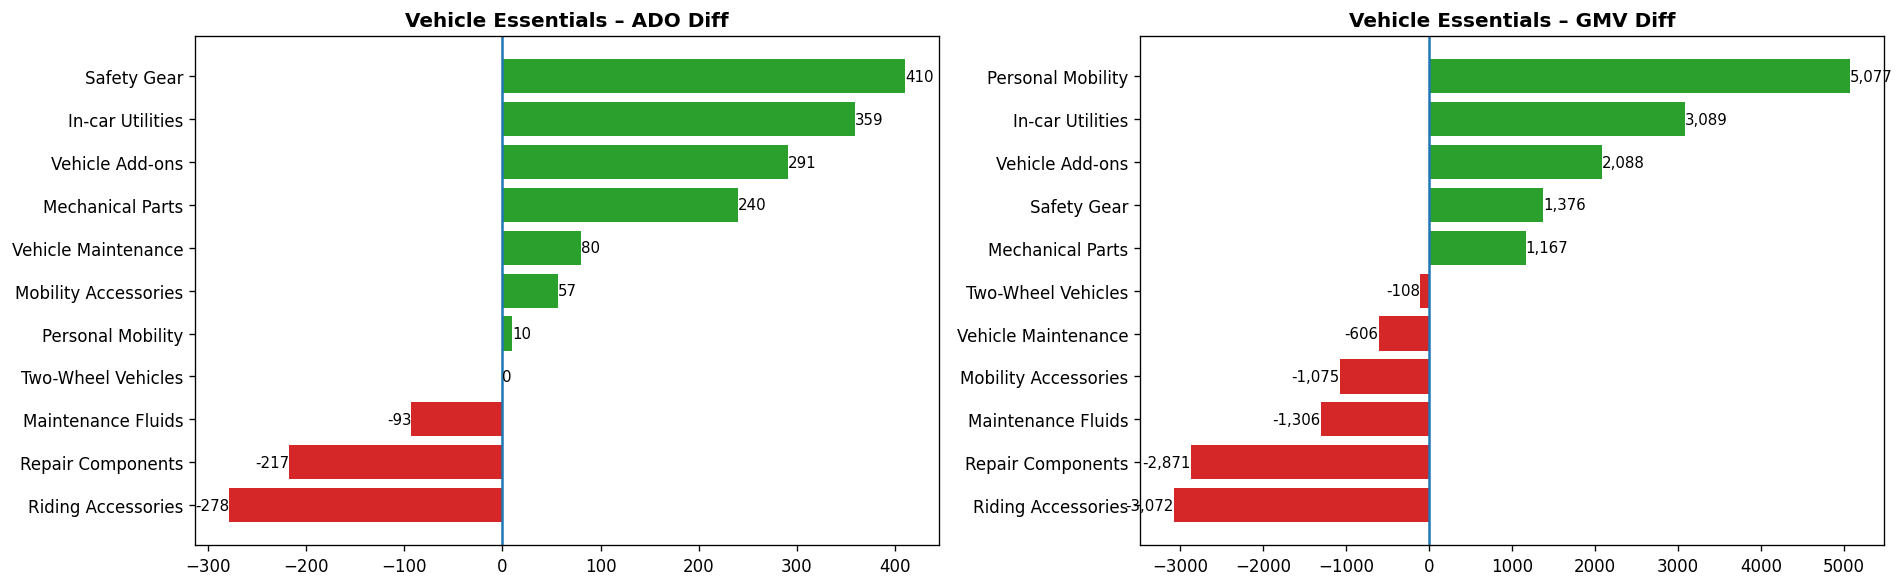

**Về Home & Technical Supplies**
 
- **ADO**: Tăng trưởng chủ yếu đến từ các ngành hàng  **Support Supplies, Construction Materials, Manual Tools**, đóng góp 136.8% tổng mức tăng. Một số sản phẩm tiêu biểu như: 
 

 
  - **Construction Materials**: **xi măng dẻo bịt lỗ** (+115.17 ADO), **sàn nhựa giả gỗ sẵn** (+61.50 ADO), **sàn nhựa giả vân gỗ** (+21.72 ADO)
 
  - **Support Supplies**: **bộ sạc 4 pin aa** (+86.11 ADO), **băng keo điện nano dai** (+68.44 ADO), **keo dính đa năng mạnh** (+60.53 ADO)
 
  - **Manual Tools**: **máy siết bulong bs iw850n** (+22.70 ADO), **mũi khoan tháp 4 12** (+19.83 ADO), **cờ lê đa năng vặn** (+17.66 ADO)
 

- **GMV**: Tăng trưởng chủ yếu đến từ nhóm (**Construction Materials, Manual Tools, Support Supplies**), đóng góp 81.9% tổng mức tăng. Một số sản phẩm tiêu biểu như:
 

 
  - **Construction Materials**: **sàn nhựa giả gỗ sẵn** (+878.86 GMV), **sàn nhựa giả vân gỗ** (+365.99 GMV), **combo 1 36 sàn nhựa** (+283.12 GMV)
 
  - **Support Supplies**: **bộ sạc 4 pin aa** (+671.30 GMV), **năng lượng mặt trời mono** (+279.78 GMV), **combo 100 keo nến dài** (+181.90 GMV)
 
  - **Manual Tools**: **máy khoan đục bê tông** (+343.46 GMV), **máy siết bulong pin drama** (+245.16 GMV), **máy siết bulong de walt** (+218.34 GMV)

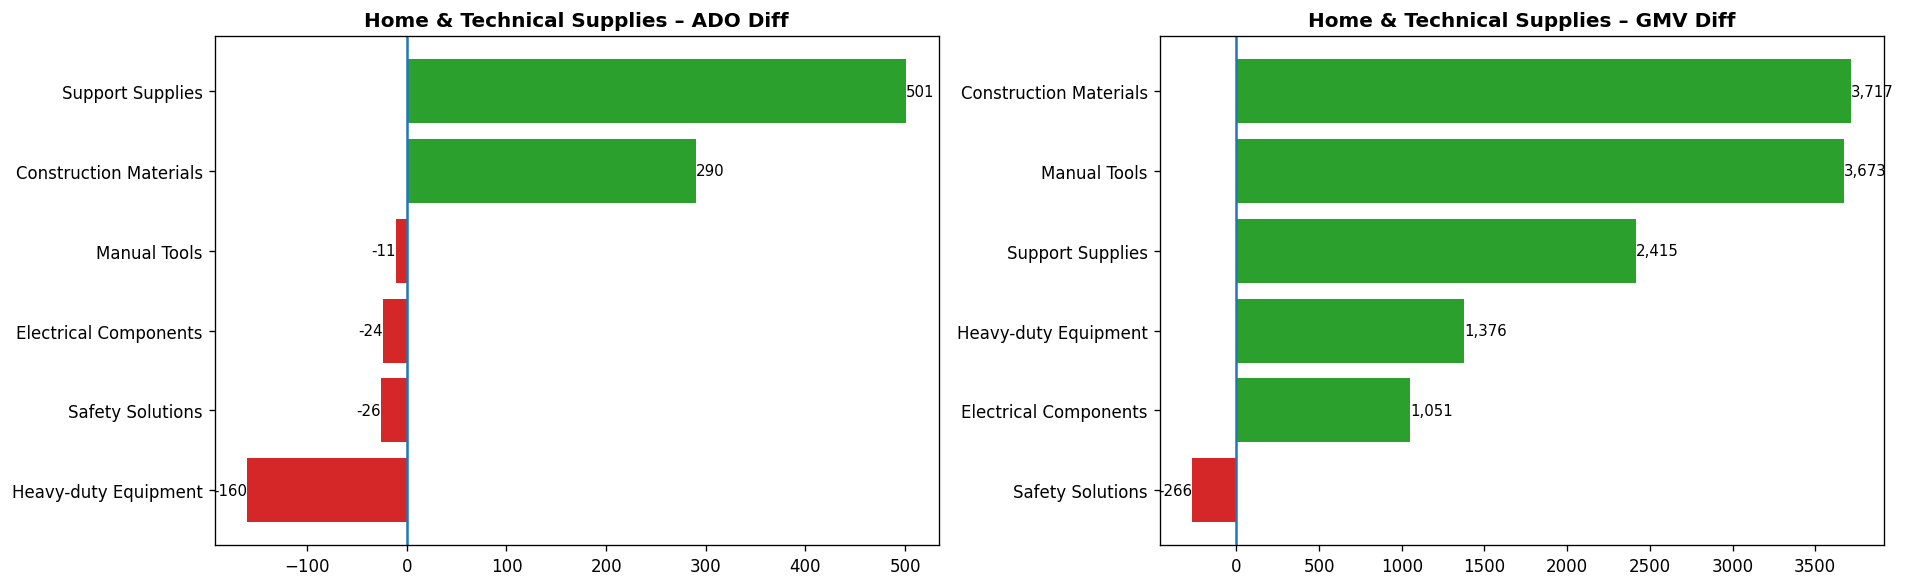

### 2.2 Các ngành hàng tăng trưởng âm:



**Về Vehicle Essentials**
 
- **ADO**: Ngành hàng tăng trưởng chậm/ giảm gồm: **Riding Accessories, Repair Components, Maintenance Fluids**, chiếm -68.5% tổng mức biến động. Một số sản phẩm giảm ADO đáng chú ý như: 
 

 
  - **Repair Components**: **cùm tăng tốc domino bao** (-36.19 ADO), **tay nắm kiểu sh mode** (-37.43 ADO), **đèn led xi nhan lùi** (-64.19 ADO).
 
  - **Riding Accessories**: **kẹp điện thoại lên đồng** (-45.40 ADO), **7 titan cực đẹp gắn** (-46.63 ADO), **bao tay daytona gù salaya** (-49.33 ADO).
 
  - **Maintenance Fluids**: **mỡ bò bảo dưỡng sên** (-2.94 ADO), **vệ sinh sên xích bảo** (-3.45 ADO), **mỡ tra bảo dưỡng xe** (-12.22 ADO).
 

- **GMV**: Ngành hàng tăng trưởng chậm/ giảm gồm: (**Riding Accessories, Repair Components, Maintenance Fluids**), chiếm -192.8% tổng mức biến động. Một số sản phẩm giảm GMV đáng chú ý như: 
 

 
  - **Riding Accessories**: **tay xách wave 50 100** (-123.01 GMV), **bi led 3 0 e11** (-138.14 GMV), **động cơ qs 3kv4 và** (-423.63 GMV).
 
  - **Repair Components**: **động cơ 5000w v4 12** (-177.38 GMV), **sạc ắc quy 6ah 150ah** (-202.61 GMV), **pô exciter 2010 êm cổ** (-256.88 GMV).
 
  - **Maintenance Fluids**: **1 12 nhớt tổng hợp** (-17.74 GMV), **combo nhớt máy láp shell** (-21.39 GMV), **mỡ tra bảo dưỡng xe** (-29.24 GMV).

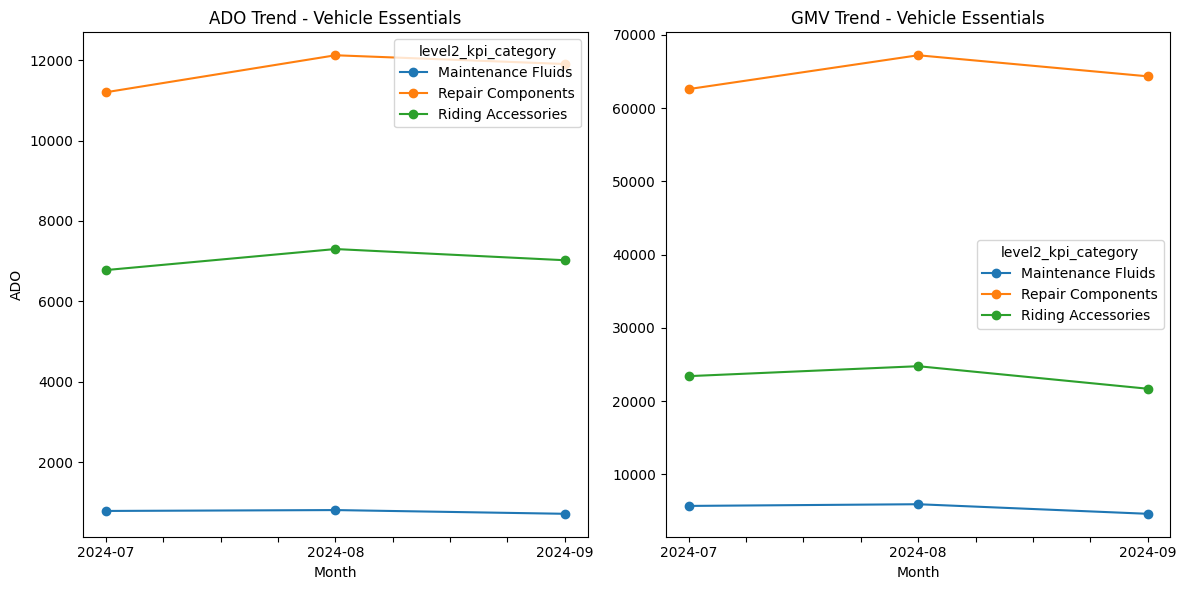

**Về Home & Technical Supplies**
 
- **ADO**: Ngành hàng tăng trưởng chậm/ giảm gồm: **Heavy-duty Equipment, Safety Solutions, Electrical Components**, chiếm -36.8% tổng mức biến động. Một số sản phẩm giảm ADO đáng chú ý như: 
 

 
  - **Electrical Components**: **tụ quạt trần điện 2** (-11.34 ADO), **công tắc điều khiển từ** (-23.93 ADO), **bộ cùm công tắc fz** (-37.89 ADO).
 
  - **Heavy-duty Equipment**: **máy xe cầm tay pin** (-8.22 ADO), **bộ lục giác đầu bi** (-16.10 ADO), **mỡ hàn thiếc trợ chì** (-17.38 ADO).
 
  - **Safety Solutions**: **khóa chống cắt zsolex** (-1.79 ADO), **ổ khóa bấm việt nhật** (-2.44 ADO), **ổ khoá tay nắm tròn** (-2.57 ADO).
 

- **GMV**: Ngành hàng tăng trưởng chậm/ giảm gồm: (**Safety Solutions**), chiếm -2.2% tổng mức biến động. Một số sản phẩm giảm GMV đáng chú ý như: 
 

 
  - **Safety Solutions**: **combo 2 cháy 4kg cứu** (-29.53 GMV), **combo 2 cháy bột abc** (-35.29 GMV), **két sắt điện tử xiaomi** (-48.75 GMV).

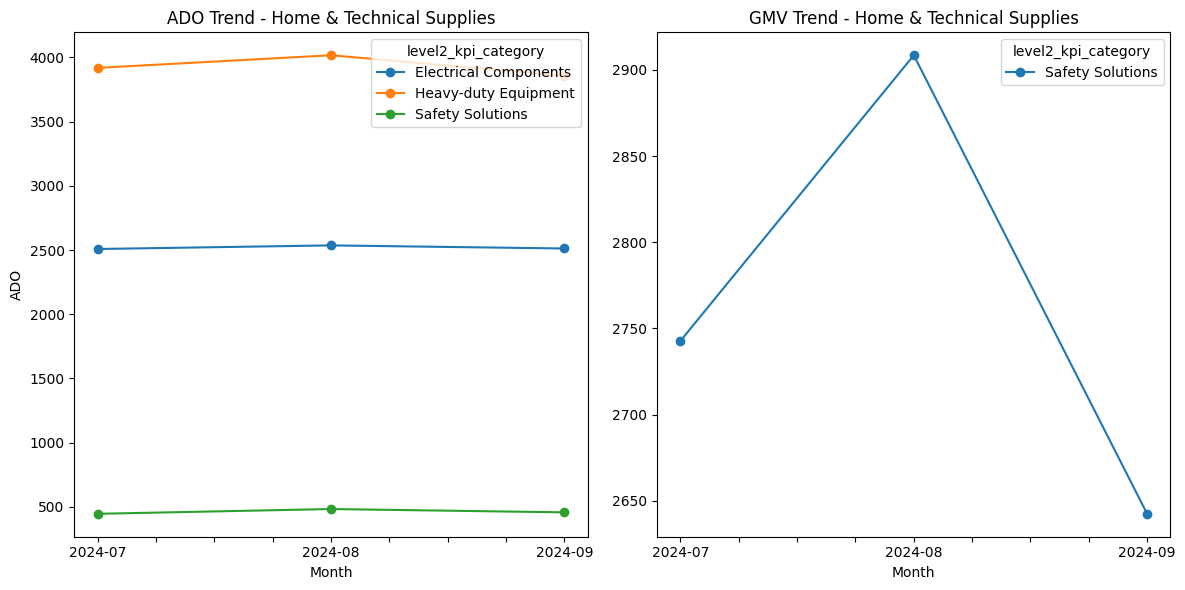

## PHẦN 3: CHẤT LƯỢNG TĂNG TRƯỞNG 



### 3.1 Tỷ trọng ADO & GMV theo ngành hàng cấp 2:



**Vehicle Essentials**
 
 - **Tỷ trọng ADO/GMV tăng ở các ngành hàng:** **In-car Utilities** (+0.98pp ADO và +1.54pp GMV), **Mechanical Parts** (+0.67pp ADO và +0.58pp GMV), **Personal Mobility** (+0.02pp ADO và +2.70pp GMV), **Safety Gear** (+1.01pp ADO và +0.56pp GMV), **Vehicle Add-ons** (+0.83pp ADO và +1.10pp GMV)
 
 - **Tỷ trọng ADO/GMV giảm ở các ngành hàng:** **Maintenance Fluids** (-0.36pp ADO và -0.80pp GMV), **Repair Components** (-1.76pp ADO và -2.42pp GMV), **Riding Accessories** (-1.52pp ADO và -2.02pp GMV)
 
 - **Tỷ trọng ADO tăng và GMV giảm ở các ngành hàng:** **Mobility Accessories** (+0.04pp ADO và -0.70pp GMV), **Two-Wheel Vehicles** (+0.00pp ADO và -0.07pp GMV), **Vehicle Maintenance** (+0.09pp ADO và -0.46pp GMV)
 
 - **Tỷ trọng ADO giảm và GMV tăng ở các ngành hàng:** 

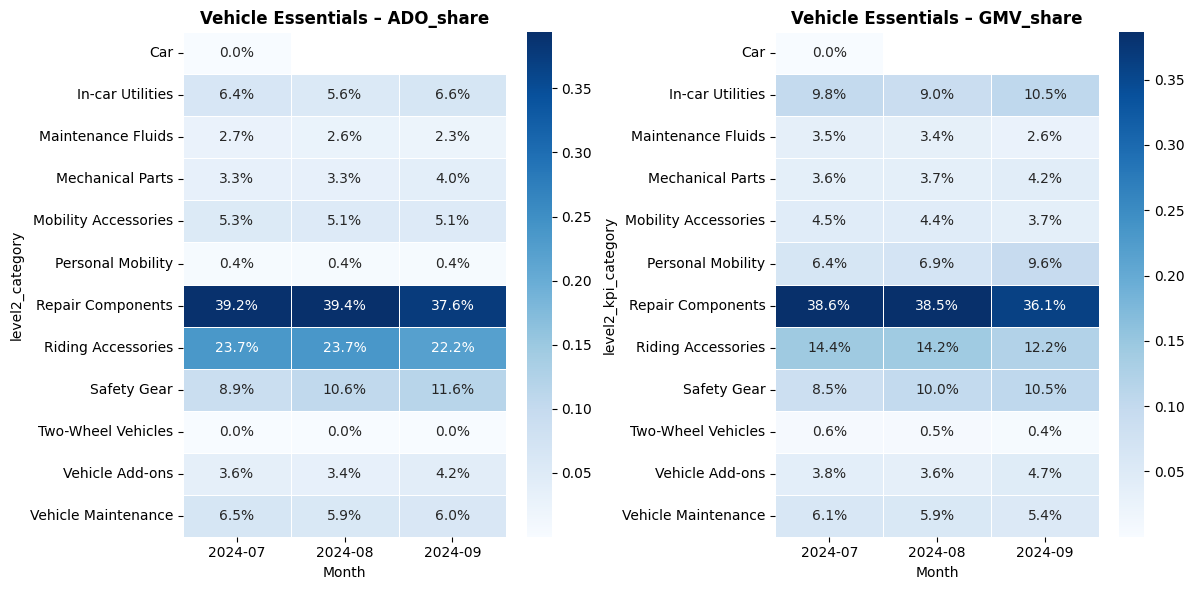

**Home & Technical Supplies**
 
 - **Tỷ trọng ADO/GMV tăng ở các ngành hàng:** **Construction Materials** (+1.60pp ADO và +2.06pp GMV), **Support Supplies** (+2.57pp ADO và +0.72pp GMV)
 
 - **Tỷ trọng ADO/GMV giảm ở các ngành hàng:** **Electrical Components** (-0.82pp ADO và -0.57pp GMV), **Heavy-duty Equipment** (-2.10pp ADO và -2.60pp GMV), **Safety Solutions** (-0.30pp ADO và -0.58pp GMV)
 
 - **Tỷ trọng ADO tăng và GMV giảm ở các ngành hàng:** 
 
 - **Tỷ trọng ADO giảm và GMV tăng ở các ngành hàng:** **Manual Tools** (-0.95pp ADO và +0.97pp GMV)

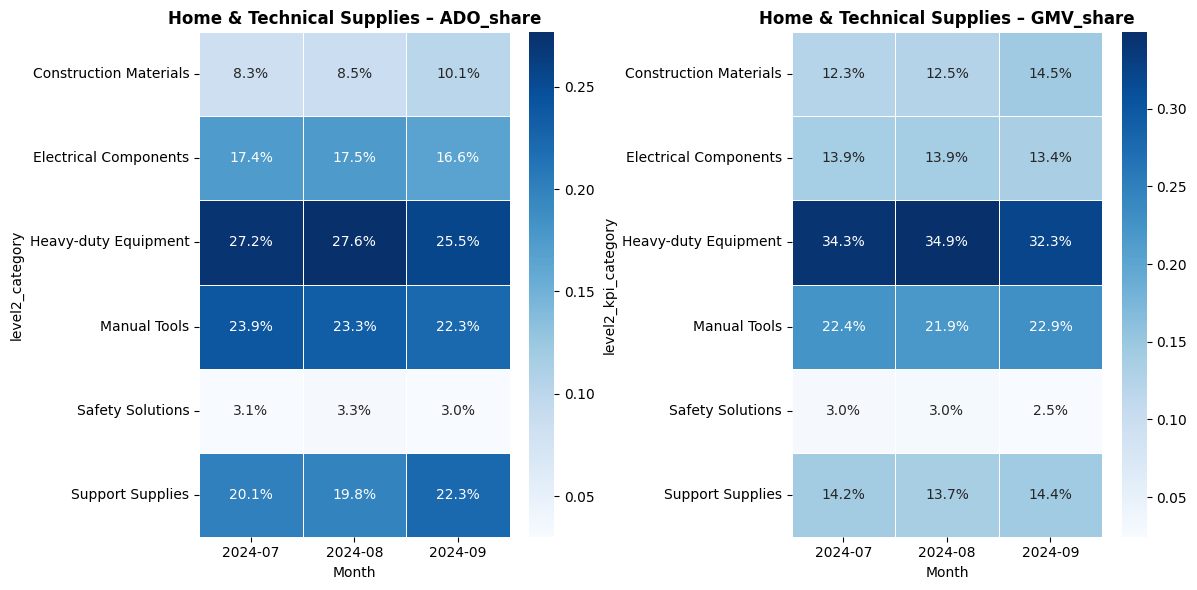

### 3.2 Ngành hàng cấp 2 có tỷ trọng lớn và tăng trưởng tốt :



**Vehicle Essentials**
  - **ADO**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là **Safety Gear** (chiếm 11.58% cơ cấu ADO và tăng trưởng +12.61% MoM ), **In-car Utilities** (chiếm 6.60% cơ cấu ADO và tăng trưởng +20.79% MoM ).
  - **GMV**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là **In-car Utilities** (chiếm 10.53% cơ cấu GMV và tăng trưởng +19.69% MoM ).

**Home & Technical Supplies**
  - **ADO**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là **Support Supplies** (chiếm 22.34% cơ cấu ADO và tăng trưởng +17.44% MoM ).
  - **GMV**: ngành hàng có tỷ trọng cao và tăng trưởng tốt là **Manual Tools** (chiếm 22.90% cơ cấu GMV và tăng trưởng +17.48% MoM ).

### 3.3 Ngành hàng cấp 2 tỷ trọng nhỏ nhưng tăng trưởng tốt:



**Vehicle Essentials**
  - **ADO**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Mechanical Parts** (chiếm 3.97% cơ cấu ADO và tăng trưởng +23.61% MoM ), **Vehicle Add-ons** (chiếm 4.19% cơ cấu ADO và tăng trưởng +28.09% MoM ).
  - **GMV**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Personal Mobility** (chiếm 9.63% cơ cấu GMV và tăng trưởng +42.02% MoM ), **Vehicle Add-ons** (chiếm 4.66% cơ cấu GMV và tăng trưởng +33.53% MoM ).

**Home & Technical Supplies**
  - **ADO**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Construction Materials** (chiếm 10.13% cơ cấu ADO và tăng trưởng +23.44% MoM ).
  - **GMV**: ngành hàng có tỷ trọng nhỏ nhưng tăng trưởng tốt là **Construction Materials** (chiếm 14.53% cơ cấu GMV và tăng trưởng +31.11% MoM ).

### 3.4 Ngành hàng cấp 2 tỷ trọng lớn nhưng tăng trưởng chậm/giảm :



**Vehicle Essentials**
  - **ADO**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Riding Accessories** (chiếm 22.19% cơ cấu ADO nhưng -3.81% MoM ), **Repair Components** (chiếm 37.62% cơ cấu ADO nhưng -1.79% MoM ).
  - **GMV**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Riding Accessories** (chiếm 12.17% cơ cấu GMV nhưng -12.40% MoM ), **Repair Components** (chiếm 36.08% cơ cấu GMV nhưng -4.27% MoM ).

**Home & Technical Supplies**
  - **ADO**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Heavy-duty Equipment** (chiếm 25.54% cơ cấu ADO nhưng -3.98% MoM ).
  - **GMV**: ngành hàng có tỷ trọng cao nhưng ghi nhận suy giảm MoM là **Heavy-duty Equipment** (chiếm 32.31% cơ cấu GMV nhưng +4.11% MoM ).

## PHẦN 4: XU HƯỚNG NGÀNH HÀNG 



### 4.1 Ngành hàng cấp 2 có xu hướng tăng :



**Vehicle Essentials** 


 - **ADO**: Ngành hàng có xu hướng tăng **Mechanical Parts** (T8 +74.85 ADO, T9 +240.15 ADO), **Mobility Accessories** (T8 +32.97 ADO, T9 +56.94 ADO), **Personal Mobility** (T8 +26.84 ADO, T9 +9.61 ADO), **Safety Gear** (T8 +696.89 ADO, T9 +410.23 ADO), **Two-Wheel Vehicles** (T8 +0.16 ADO, T9 +0.02 ADO).
 - **GMV**: Ngành hàng có xu hướng tăng **Mechanical Parts** (T8 +522.06 GMV, T9 +1166.66 GMV), **Personal Mobility** (T8 +1663.79 GMV, T9 +5077.19 GMV), **Safety Gear** (T8 +3572.13 GMV, T9 +1375.56 GMV), **Vehicle Add-ons** (T8 +15.57 GMV, T9 +2088.19 GMV).

**Home & Technical Supplies** 


 - **ADO**: Ngành hàng có xu hướng tăng **Construction Materials** (T8 +38.68 ADO, T9 +290.34 ADO).
 - **GMV**: Ngành hàng có xu hướng tăng **Construction Materials** (T8 +548.22 GMV, T9 +3716.92 GMV), **Electrical Components** (T8 +508.24 GMV, T9 +1050.87 GMV), **Heavy-duty Equipment** (T8 +1626.14 GMV, T9 +1376.46 GMV), **Manual Tools** (T8 +253.21 GMV, T9 +3672.84 GMV).

### 4.2 Ngành hàng cấp 2 có xu hướng giảm :



**Vehicle Essentials** 


 - **ADO**: Không có ngành hàng nào có xu hướng giảm.


 - **GMV**: Ngành hàng có xu hướng giảm **Two-Wheel Vehicles** (T8 -83.40 GMV, T9 -107.67 GMV).

 

**Home & Technical Supplies** 


 - **ADO**: Ngành hàng có xu hướng giảm **Manual Tools** (T8 -62.05 ADO, T9 -11.31 ADO).


 - **GMV**: Không có ngành hàng nào có xu hướng giảm. 

## PHẦN 5: XU HƯỚNG SẢN PHẨM 



### 5.1 Các sản phẩm có xu hướng tăng trong tháng gần nhất :



Xu hướng tăng theo ADO 



,Level 1,Level 2,Sản phẩm tiêu biểu| ΔADO lũy kế
0,Home & Technical Supplies,Construction Materials,"sơn mạ crom chrome sáng (+15), combo 1 36 sàn nhựa (+14), xe đẩy hàng 4 bánh (+10), vòi bát inox 304 bồn (+9), máy phun sơn cầm tay (+9)"
1,Home & Technical Supplies,Electrical Components,"công tắc bập bênh kcd1 (+30), mạch sạc pin tp4056 cổng (+20), bộ tua vít đa năng (+19), ổ cắm điện đa năng (+19), ổ cắm điện usb đa (+17)"
2,Home & Technical Supplies,Heavy-duty Equipment,"công tắc bập bênh kcd1 (+30), bộ tua vít đa năng (+19), thân máy mài chân pin (+18), thiếc hàn 63a 63 đường (+15), đỡ máy cắt cầm tay (+12)"
3,Home & Technical Supplies,Manual Tools,"cờ lê đa năng vặn (+27), bộ tua vít đa năng (+19), nắp chặn lỗ cống thoát (+15), máy siết bulong pin workfix (+14), thân máy siết bulong hitachi (+14)"
4,Home & Technical Supplies,Safety Solutions,"khoá dây cáp chống cắt (+14), khóa ổ chống cắt circle (+13), khóa đồng 3p 4p 5p (+5), két sắt hình quyển sách (+5), chốt khóa inox 90 180 (+4)"
5,Home & Technical Supplies,Support Supplies,"bộ sạc 4 pin aa (+86), keo dính đa năng mạnh (+66), pin cmos 2032 3v panasonic (+41), pin sạc lithium 18650 6800mah (+32), thước gofuther 3m 5m 7 (+29)"
6,Vehicle Essentials,In-car Utilities,"bộ mô hình 6 con (+21), rèm nắng ô tô chắn (+17), ổ cắm nguồn đầu tẩu (+16), bọc vô lăng ô tô (+14), thảm lót cốp xe ô (+13)"
7,Vehicle Essentials,Maintenance Fluids,"hòa dyramid xăng con vệ (+43), nhớt fuchs silkolene pro 4 (+8), dung dịch vệ sinh buồng (+8), nhớt xe máy tora 20w50 (+6), nhớt tổng hợp kixx ultra (+5)"
8,Vehicle Essentials,Mechanical Parts,"đèn trợ sáng bi cầu (+191), xi nhan chữ z trung (+131), 01 dây đèn led mí (+51), sạc ắc quy ô tô (+30), đèn led pha bi cầu (+30)"
9,Vehicle Essentials,Mobility Accessories,"đèn trợ sáng xe máy (+55), bơm xe đạp áp suất (+34), đèn xe đạp thể thao (+25), bi sắt xe đạp 6 (+21), bộ tua vít đa năng (+19)"


Xu hướng tăng theo GMV 



,Level 1,Level 2,Sản phẩm tiêu biểu| ΔADO lũy kế
0,Home & Technical Supplies,Construction Materials,"combo 1 36 sàn nhựa (+368), xe đẩy hàng 4 bánh (+292), xi măng dẻo bịt lỗ (+155), sàn nhựa giả gỗ keo (+154), máy phun sơn cầm tay (+149)"
1,Home & Technical Supplies,Electrical Components,"ổ cắm điện đa năng (+72), ổ cắm điện usb đa (+45), ic votol 7280s em80s xe (+44), công tắc cảm biến dòng (+40), dây chịu nhiệt awg vỏ (+30)"
2,Home & Technical Supplies,Heavy-duty Equipment,"máy hàn mig 3 chức (+263), thân máy mài chân pin (+221), máy hàn mig không dùng (+183), máy hàn điện tử mma450 (+134), máy cưa xích 12in wf (+113)"
3,Home & Technical Supplies,Manual Tools,"máy khoan đục bê tông (+420), máy siết bulong pin workfix (+294), máy siết bulong pin drama (+246), thân máy siết bulong hitachi (+166), máy khoan pin 35 cấp (+132)"
4,Home & Technical Supplies,Safety Solutions,"khóa ổ chống cắt circle (+44), két sắt hình quyển sách (+41), khóa đồng 3p 4p 5p (+37), cầu cháy xfztbl6 bột abc (+30), khoá dây cáp chống cắt (+27)"
5,Home & Technical Supplies,Support Supplies,"bộ sạc 4 pin aa (+671), năng lượng mặt trời mono (+412), xi măng dẻo bịt lỗ (+155), thước gofuther 3m 5m 7 (+124), pin sạc aa aaa beston (+117)"
6,Vehicle Essentials,In-car Utilities,"camera hành trình 70mai dash (+434), thảm lót sàn nhựa 5d (+327), camera hành trình 70mai a500s (+199), thảm lót cốp xe ô (+196), lót ghế ô tô hạt (+167)"
7,Vehicle Essentials,Maintenance Fluids,"nhớt fuchs silkolene pro 4 (+104), hòa dyramid xăng con vệ (+93), nhớt motul 7100 10w40 1l (+48), bậc nẹp bước chân xe (+41), nhớt tổng hợp kixx ultra (+41)"
8,Vehicle Essentials,Mechanical Parts,"đèn trợ sáng bi cầu (+466), sạc ắc quy ô tô (+304), ắc quy khô bảo dưỡng (+282), đèn pha led bi cầu (+240), xi nhan chữ z trung (+212)"
9,Vehicle Essentials,Mobility Accessories,"ic đúc 1500w bản mạnh (+132), sạc xe đạp điện máy (+107), bi sắt xe đạp 6 (+97), đèn xe đạp thể thao (+88), khoá dây 5 số xe (+57)"


### 5.2 Các sản phẩm có xu hướng giảm trong tháng gần nhất:



Xu hướng giảm theo ADO 



,Level 1,Level 2,Sản phẩm tiêu biểu| ΔADO lũy kế
0,Home & Technical Supplies,Construction Materials,"xe kéo đi chợ thị (+8), lưới nắng 90 may đóng (+7), đầu vòi bồn chén tăng (+6), bạt nắng mưa trời đa (+6), xe kéo đi thị chợ (+4)"
1,Home & Technical Supplies,Electrical Components,"tụ quạt 400v các 1uf (+9), ống silicon dẻo chịu nhiệt (+8), công tắc hẹn giờ thông (+6), bộ công tắc hẹn giờ (+6), bộ điều khiển công tắc (+4)"
2,Home & Technical Supplies,Heavy-duty Equipment,"ê tô kẹp bàn vật (+11), dây xe 10m 15 20 (+9), thiếc hàn nhựa thông sn60 (+8), ống xoắn pu jisan hàn (+8), đầu bơm máy xe áp (+7)"
3,Home & Technical Supplies,Manual Tools,"ống silicon dẻo chịu nhiệt (+8), máy khoan pin đầu kẹp (+6), bộ 3 mũi khoan bước (+6), búa cao su đa năng (+6), búa đa năng cầm tay (+5)"
4,Home & Technical Supplies,Safety Solutions,"combo 2 cháy 4kg cứu (+3), chốt tự đóng inox 304 (+1), két sắt điện tử xiaomi (+1), combo hai cháy có đồng (+1), cháy bột abc 4kg cứu (+1)"
5,Home & Technical Supplies,Support Supplies,"keo đa năng dính nhựa (+14), keo bọt nở xốp foam (+10), keo nến chất lượng cao (+10), 40 toshiba aaa gắn remote (+7), keo vải uhu nhanh khô (+6)"
6,Vehicle Essentials,In-car Utilities,"rèm nắng theo xe hút (+7), sáp thơm areon car247 ken (+5), thảm taplo da cacbon ô (+4), đệm ô tô nệm xe (+4), rèm nắng xe ô tô (+3)"
7,Vehicle Essentials,Maintenance Fluids,"dầu nhớt xe tay ga (+11), vệ sinh sên xích bảo (+9), dầu nhớt xe số motul (+4), dung dịch mát động cơ (+4), combo nhớt máy láp shell (+4)"
8,Vehicle Essentials,Mechanical Parts,"dây led audi chạy hiệu (+5), đèn led cảnh báo nguy (+3), bộ 2 kẹp ắc quy (+2), cáp đấu trực tiếp điện (+2), bộ vá lốp không săm (+2)"
9,Vehicle Essentials,Mobility Accessories,"yên xe đạp thể thao (+9), 700 bi 7mm chống rỉ (+8), bánh xe đạp trẻ em (+4), đổi nguồn từ 36v 72v (+3), yên xe đạp active chống (+3)"


Xu hướng giảm theo GMV 



,Level 1,Level 2,Sản phẩm tiêu biểu| ΔADO lũy kế
0,Home & Technical Supplies,Construction Materials,"thang nhôm rút chữ a (+109), xe kéo đi chợ thị (+84), thang nhôm rút jiroshi nhật (+67), kích kê gạch nâng lát (+53), xe kéo đi thị chợ (+42)"
1,Home & Technical Supplies,Electrical Components,"combo bộ chuyển đổi 2 (+74), bộ công tắc hẹn giờ (+42), bộ chuyển nguồn điện ats (+35), ổ cắm điện quang 4 (+29), khởi động từ 1 pha (+25)"
2,Home & Technical Supplies,Heavy-duty Equipment,"máy không dầu 24l 600w (+91), combo bộ chuyển đổi 2 (+74), máy xe xpower rx 3a (+72), máy hàn mig forton 270 (+67), đầu bơm máy xe áp (+51)"
3,Home & Technical Supplies,Manual Tools,"máy khoan tường bê tông (+176), máy khoan pin đầu kẹp (+101), khoan 3 chức năng có (+66), máy siết bulong workfix wf (+58), kích kê gạch nâng lát (+53)"
4,Home & Technical Supplies,Safety Solutions,"két sắt điện tử xiaomi (+107), combo 2 cháy 4kg cứu (+64), combo hai cháy có đồng (+26), combo 2 cháy bột abc (+12), cháy bột abc 4kg cứu (+12)"
5,Home & Technical Supplies,Support Supplies,"máy siết bulong workfix wf (+58), keo nến chất lượng cao (+49), keo bọt nở xốp foam (+42), màng co nhiệt pvc kích (+37), bộ 20kg keo ab cứng (+34)"
6,Vehicle Essentials,In-car Utilities,"rèm nắng theo xe hút (+61), đệm ô tô nệm xe (+45), rèm nắng xe ô tô (+34), giường đệm gấp gọn xe (+30), nệm để xe ô tô (+27)"
7,Vehicle Essentials,Maintenance Fluids,"dầu nhớt xe tay ga (+77), vệ sinh sên xích bảo (+31), combo nhớt máy láp shell (+28), 1 12 nhớt tổng hợp (+27), dầu nhớt xe số motul (+26)"
8,Vehicle Essentials,Mechanical Parts,"đèn led cảnh báo nguy (+24), ty thủy lực ben dài (+17), gạt mưa xe ô tô (+13), dây led audi chạy hiệu (+12), gạt mưa xương phổ thông (+8)"
9,Vehicle Essentials,Mobility Accessories,"bộ tay lắc l twoo (+321), yên xe đạp thể thao (+37), bơm xe đạp chân kirito (+16), ic đúc 1200w 48v 72v (+16), yên xe đạp active chống (+15)"


In [156]:
from IPython.display import Markdown, display

# ===== SECTION 1: TỔNG QUAN =====
section_summary = []

section_summary.append("## PHẦN 1: TỔNG QUAN \n\n")
section_summary.append(
    f"\n \n Ngành hàng **Auto & Tools** {cur_month} so với {last_month} "
    f"{growth_lable(diff_ado_overall)} {format_num(diff_ado_overall)} về ADO "
    f"({format_pct(grow_ado_overall)} MoM) và "
    f"{growth_lable(diff_gmv_overall)} {format_num(diff_gmv_overall)} về GMV "
    f"({format_pct(grow_gmv_overall)} MoM)."
)
texts_l1
section_summary.append("\n**Trong đó:**")
for t in texts_l1:
    section_summary.append(f"- {t}")

display(Markdown("\n\n".join(section_summary)+'\n\n'))

# Chart ADO/GMV theo level 1
plot_gmv_ado_dual_chart(l1_by_month)

# ===== SECTION 2: LEVEL 2 INSIGHT =====

display(Markdown("## PHẦN 2: PHÂN TÍCH ĐỘNG LỰC TĂNG TRƯỞNG \n\n"))

display(Markdown(
    "### 2.1 Các ngành hàng đóng góp tăng trưởng chính:\n\n"
))

# Tăng trưởng Auto
insight_text_1 = insight_ado_gmv_from_items(
            contrib_ado_df= highest_ado_contrib,
            contrib_gmv_df= highest_gmv_contrib,
            df_ado= top3_items_ado,
            df_gmv = top3_items_gmv,
            lvl1='Vehicle Essentials'
    )
display(Markdown(insight_text_1))
plot_cat(df_auto,'Vehicle Essentials')

# Tăng trưởng Tool
insight_text_2 = insight_ado_gmv_from_items(
            contrib_ado_df= highest_ado_contrib,
            contrib_gmv_df= highest_gmv_contrib,
            df_ado= top3_items_ado,
            df_gmv = top3_items_gmv,
            lvl1='Home & Technical Supplies'
    )
display(Markdown(insight_text_2))

plot_cat(df_tool,'Home & Technical Supplies')

display(Markdown("### 2.2 Các ngành hàng tăng trưởng âm:\n\n"))

# Insight text
insight_text_3= insight_low_ado_gmv_items(
                                          contrib_ado_df= df_lowest_l2_ado,
                                          contrib_gmv_df= df_lowest_l2_gmv,
                                          df_ado= top3_items_low_ado,
                                          df_gmv = top3_items_low_gmv,
                                          lvl1="Vehicle Essentials"
                                        )

display(Markdown(insight_text_3))

plot_trend_cat(auto_trend_ado,auto_trend_gmv,'Vehicle Essentials')

insight_text_4= insight_low_ado_gmv_items(
                                          contrib_ado_df= df_lowest_l2_ado,
                                          contrib_gmv_df= df_lowest_l2_gmv,
                                          df_ado= top3_items_low_ado,
                                          df_gmv = top3_items_low_gmv,
                                          lvl1="Home & Technical Supplies"
                                        )
display(Markdown(insight_text_4))

plot_trend_cat(tool_trend_ado,tool_trend_gmv,"Home & Technical Supplies")

#===== SECTION 3: QUANTITY GROWTH ========
display(Markdown("## PHẦN 3: CHẤT LƯỢNG TĂNG TRƯỞNG \n\n"))
# Tỷ trọng
display(Markdown(
    "### 3.1 Tỷ trọng ADO & GMV theo ngành hàng cấp 2:\n\n"
))
insight_text_5 = tag_share(total_share,"Vehicle Essentials")
display(Markdown(insight_text_5))
# Chart
plot_heatmap_share(
    total_share,
    lv1='Vehicle Essentials'
)

insight_text_6 = tag_share(total_share,"Home & Technical Supplies")
display(Markdown(insight_text_6))
# Chart
plot_heatmap_share(
    total_share,
    lv1='Home & Technical Supplies'
)
# Tăng trưởng tốt và tỷ trọng cao
display(Markdown(
    "### 3.2 Ngành hàng cấp 2 có tỷ trọng lớn và tăng trưởng tốt :\n\n"
))
insight_text_7 = quantile_share_diff(df_merge_share,'Vehicle Essentials')

display(Markdown("\n".join(insight_text_7)))

insight_text_8 = quantile_share_diff(df_merge_share,'Home & Technical Supplies')

display(Markdown("\n".join(insight_text_8)))

# Tăng trưởng tốt và tỷ trọng nhỏ
display(Markdown(
    "### 3.3 Ngành hàng cấp 2 tỷ trọng nhỏ nhưng tăng trưởng tốt:\n\n"
))
insight_text_9 = quantile_share_diff_2(df_merge_share,'Vehicle Essentials')
display(Markdown("\n".join(insight_text_9)))

insight_text_10 = quantile_share_diff_2(df_merge_share,'Home & Technical Supplies')
display(Markdown("\n".join(insight_text_10)))

# Tăng trưởng âm và tỷ trọng nhỏ
display(Markdown(
    "### 3.4 Ngành hàng cấp 2 tỷ trọng lớn nhưng tăng trưởng chậm/giảm :\n\n"
))
insight_text_11 = quantile_share_diff_3(df_merge_share,'Vehicle Essentials')
display(Markdown("\n".join(insight_text_11)))

insight_text_12 = quantile_share_diff_3(df_merge_share,'Home & Technical Supplies')
display(Markdown("\n".join(insight_text_12)))

#===== SECTION 4: TRENDING CAT LEVEL 2 ========
display(Markdown("## PHẦN 4: XU HƯỚNG NGÀNH HÀNG \n\n"))

display(Markdown(
    "### 4.1 Ngành hàng cấp 2 có xu hướng tăng :\n\n"
))
insight_text_13 =trend_grow(df_lv2_gr_month,"Vehicle Essentials")
display(Markdown("\n".join(insight_text_13)))

insight_text_14 =trend_grow(df_lv2_gr_month,"Home & Technical Supplies")
display(Markdown("\n".join(insight_text_14)))

display(Markdown(
    "### 4.2 Ngành hàng cấp 2 có xu hướng giảm :\n\n"
))
insight_text_15 =trend_down(df_lv2_gr_month,"Vehicle Essentials")
display(Markdown("\n".join(insight_text_15)))

insight_text_16 =trend_down(df_lv2_gr_month,"Home & Technical Supplies")
display(Markdown("\n".join(insight_text_16)))

#===== SECTION 5: TRENDING ITEMS ========

display(Markdown("## PHẦN 5: XU HƯỚNG SẢN PHẨM \n\n"))

display(Markdown(
    "### 5.1 Các sản phẩm có xu hướng tăng trong tháng gần nhất :\n\n"
))
display(Markdown("Xu hướng tăng theo ADO \n\n"))
display(table_view_grow(items_trend_grow_ado))

display(Markdown("Xu hướng tăng theo GMV \n\n"))
display(table_view_grow(items_trend_grow_gmv))


display(Markdown(
    "### 5.2 Các sản phẩm có xu hướng giảm trong tháng gần nhất:\n\n"
))

display(Markdown("Xu hướng giảm theo ADO \n\n"))
display(table_view_down(items_trend_down_ado))

display(Markdown("Xu hướng giảm theo GMV \n\n"))
display(table_view_down(items_trend_down_gmv))
